In [ ]:
!pip install geopandas
!pip install pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# This ensures visualizations are plotted inside the notebook  
%matplotlib inline                 

# Import relevant packages  
import os                              # This provides several system utilities 
import pandas as pd                    # This is the workhorse of data munging in Python  
import seaborn as sns                  # This allows us to easily and beautifully plot  
import matplotlib.pyplot as plt        # This allows for basic plotting  
import numpy as np                     # This allows to perform computational measures
import geopandas as gpd                # This allows for pandas to deal with geodata
import pysal
from sklearn.cluster import KMeans
import pylab as plot
   

In [ ]:
# the path to the file is defined
f='FINAL_DATAFRAME_social_data_21juni.xlsx'
# the data is read, where the first column has been chosen as the index column
data = pd.read_excel(f) 
#show first 5 rows of the dataframe
data.head()

level levelname sd     sdname Wijkcode         neighborhoodcodename  \
0      4    Wijken  A  A Centrum      A00    A00 Burgwallen-Oude Zijde   
1      4    Wijken  A  A Centrum      A01  A01 Burgwallen-Nieuwe Zijde   
2      4    Wijken  A  A Centrum      A02      A02 Grachtengordel-West   
3      4    Wijken  A  A Centrum      A03      A03 Grachtengordel-Zuid   
4      4    Wijken  A  A Centrum      A04       A04 Nieuwmarkt/Lastage   

          neighborhoodname  gsd  Older_old  Young_children  ...  \
0    Burgwallen-Oude Zijde    1         73             4.2  ...   
1  Burgwallen-Nieuwe Zijde    1         72             4.0  ...   
2      Grachtengordel-West    1        172             9.0  ...   
3      Grachtengordel-Zuid    2        150            10.1  ...   
4       Nieuwmarkt/Lastage    2        386             7.9  ...   

   Debt_assistance  Energy_consumption  Shared_property  Under_occupancy  \
0              0.7               16.75        15.014899              0.0   
1              0.5                9.81        19.739749              1.0   
2              0.2                9.66        18.647350              2.0   
3              0.2               10.90        16.913127              2.0   
4              0.7                8.68        19.516382              1.0   

   Full_time_student  Satisfaction_rate_communication  Social_participation  \
0               13.7                             79.0                  14.0   
1               10.2                             79.0                  14.0   
2                8.3                             79.0                  14.0   
3                8.0                             79.0                  14.0   
4                9.4                             78.0                  13.0   

   Unemployment  Educational_level  Unwillingness_invest_EE  
0           4.9               10.0                     54.0  
1           3.8                9.0                     55.0  
2           2.6                7.0                     46.0  
3           3.0                9.0                     41.0  
4           6.9               11.0                     49.0  

[5 rows x 37 columns]

In [ ]:
#show last 5 rows of the dataframe
data.tail()

level levelname sd      sdname Wijkcode        neighborhoodcodename  \
93      4    Wijken  T  T Zuidoost      T94    T94 Bijlmer-Oost (E,G,K)   
94      4    Wijken  T  T Zuidoost      T95              T95 Nellestein   
95      4    Wijken  T  T Zuidoost      T96  T96 Holendrecht/Reigersbos   
96      4    Wijken  T  T Zuidoost      T97                    T97 Gein   
97      4    Wijken  T  T Zuidoost      T98                T98 Driemond   

          neighborhoodname  gsd  Older_old  Young_children  ...  \
93    Bijlmer-Oost (E,G,K)   21        766            15.7  ...   
94              Nellestein   22        138            11.3  ...   
95  Holendrecht/Reigersbos   22        564            15.5  ...   
96                    Gein   22        195            18.4  ...   
97                Driemond   22         47            32.7  ...   

    Debt_assistance  Energy_consumption  Shared_property  Under_occupancy  \
93              4.6               12.87        12.735884              1.0   
94              1.7               17.22         4.183038              5.0   
95              4.5               13.41        13.411803              2.0   
96              2.7               10.83         5.810749              4.0   
97              0.7                 NaN              NaN              4.0   

    Full_time_student  Satisfaction_rate_communication  Social_participation  \
93               10.1                             86.0                   4.0   
94                5.7                             81.0                   7.0   
95                8.0                             81.0                   7.0   
96                7.3                             81.0                   7.0   
97                5.0                             81.0                   7.0   

    Unemployment  Educational_level  Unwillingness_invest_EE  
93          13.2               39.0                     64.0  
94           6.4               20.0                     49.0  
95          14.5               39.0                     58.0  
96          11.4               34.0                     57.0  
97           5.4               26.0                      NaN  

[5 rows x 37 columns]

In [ ]:
#Delete irrelevant columns
del data['level']
del data['levelname']
del data['sd']
del data['gsd']

In [ ]:
# information about the datafile gathered to get insight in the type of the variables and the number of non-null counts.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sdname                           98 non-null     object 
 1   Wijkcode                         98 non-null     object 
 2   neighborhoodcodename             98 non-null     object 
 3   neighborhoodname                 98 non-null     object 
 4   Older_old                        98 non-null     int64  
 5   Young_children                   98 non-null     float64
 6   Lone_parent                      98 non-null     int64  
 7   Mental_health_issues             98 non-null     int64  
 8   Disability                       98 non-null     int64  
 9   Precarious                       96 non-null     float64
 10  Proficiency_in_Dutch             98 non-null     int64  
 11  Ethnicity                        98 non-null     float64
 12  Large_household_size    

In [ ]:
#show the distribution of the vulnerability variables
data.describe()

Older_old  Young_children  Lone_parent  Mental_health_issues  \
count    98.000000       98.000000    98.000000             98.000000   
mean    232.530612       16.775510   412.948980              8.826531   
std     197.753476        9.461698   391.176586              2.389951   
min       0.000000        0.600000     1.000000              4.000000   
25%      87.000000       10.525000   158.500000              7.000000   
50%     197.500000       14.150000   355.500000              9.000000   
75%     316.750000       21.500000   546.750000             10.000000   
max    1073.000000       60.900000  2525.000000             14.000000   

       Disability  Precarious  Proficiency_in_Dutch  Ethnicity  \
count   98.000000   96.000000             98.000000  98.000000   
mean    13.969388    3.520833           1839.571429  31.191837   
std      5.229682    1.954478           2015.925052  16.298066   
min      4.000000    0.000000             21.000000   3.900000   
25%      9.250000    2.000000            544.500000  18.250000   
50%     13.000000    3.200000           1207.000000  27.500000   
75%     18.000000    5.225000           2317.500000  42.325000   
max     23.000000    7.800000          12521.000000  70.700000   

       Large_household_size  Private_renting  ...  Debt_assistance  \
count             98.000000        85.000000  ...        98.000000   
mean              51.336735        48.141176  ...         1.829592   
std               64.597556        16.606907  ...         1.309931   
min                0.000000         0.000000  ...         0.100000   
25%                8.000000        38.000000  ...         0.800000   
50%               21.500000        51.000000  ...         1.650000   
75%               70.250000        60.000000  ...         2.500000   
max              269.000000        79.000000  ...         7.800000   

       Energy_consumption  Shared_property  Under_occupancy  \
count           81.000000        83.000000        84.000000   
mean             8.976049        10.084701         1.833333   
std              4.451677         4.008338         1.868143   
min              1.880000         0.000000         0.000000   
25%              5.800000         7.722187         1.000000   
50%              8.290000         9.740430         1.000000   
75%             11.920000        12.511029         2.000000   
max             20.640000        19.739749        11.000000   

       Full_time_student  Satisfaction_rate_communication  \
count          96.000000                        98.000000   
mean            8.253125                        78.500000   
std             3.941011                         6.261073   
min             0.000000                        58.000000   
25%             6.300000                        75.000000   
50%             7.550000                        80.000000   
75%             9.025000                        83.000000   
max            26.100000                        89.000000   

       Social_participation  Unemployment  Educational_level  \
count             98.000000     95.000000          97.000000   
mean              12.683673      9.086316          21.391753   
std                4.427182      4.205255          10.688347   
min                4.000000      1.800000           5.000000   
25%               10.000000      5.900000          12.000000   
50%               11.000000      8.700000          18.000000   
75%               15.000000     11.850000          31.000000   
max               22.000000     29.400000          42.000000   

       Unwillingness_invest_EE  
count                83.000000  
mean                 54.831325  
std                   8.155231  
min                  26.000000  
25%                  50.000000  
50%                  54.000000  
75%                  58.500000  
max                  76.000000  

[8 rows x 29 columns]

In [ ]:
#Show the number of columns
number_of_columns= len(data.columns)
number_of_columns

33

In [ ]:
#number of rows in the data
number_of_rows= len(data.index)
number_of_rows

98

In [ ]:
#Count the number of missing values
data.isnull().sum()

sdname                              0
Wijkcode                            0
neighborhoodcodename                0
neighborhoodname                    0
Older_old                           0
Young_children                      0
Lone_parent                         0
Mental_health_issues                0
Disability                          0
Precarious                          2
Proficiency_in_Dutch                0
Ethnicity                           0
Large_household_size                0
Private_renting                    13
Social_housing_renting             13
Gender                              0
Energy_inefficient_property         0
Old_heating_system                 15
No_solar_panels                    14
No_income                           1
Retired                             3
Provision_of_unpaid_care            0
Loneliness                         11
Debt_assistance                     0
Energy_consumption                 17
Shared_property                    15
Under_occupa

# Spatial Data

In [ ]:
#Loading the spatial data for spatial mappin
df = gpd.read_file('geojson_lnglat.php.json', index_col=0)
#Showing the first 50 rows
df.head(50)

Wijkcode                          Wijknaam Stadsdeelcode  Oppervlakte_m2  \
0       T92              Amstel III/Bullewijk             T         5273638   
1       T93           Bijlmer Centrum (D,F,H)             T         3158132   
2       T97                              Gein             T         1921404   
3       T95                        Nellestein             T         2281664   
4       SAE                          Aetsveld             S          497034   
5       SAD                           Hogewey             S         1494897   
6       F83                           De Punt             F          599615   
7       E18                       Kinkerbuurt             E          273939   
8       K23                            Zuidas             K         2166492   
9       N63                Tuindorp Buiksloot             N          173013   
10      F76              Slotermeer-Noordoost             F         1015073   
11      M35                       IJburg West             M         1267224   
12      E38                       Erasmuspark             E          405100   
13      F81                       Osdorp-Oost             F         1665931   
14      A07                 De Weteringschans             A          629722   
15      K54                         Rijnbuurt             K          987919   
16      N74                        Elzenhagen             N          860885   
17      N60                         Volewijck             N         1287520   
18      A00             Burgwallen-Oude Zijde             A          400403   
19      E21                  Overtoomse Sluis             E          308594   
20      F78                        Geuzenveld             F         1412525   
21      K25                       Nieuwe Pijp             K          527369   
22      N67                          Kadoelen             N         1496005   
23      M57                         Betondorp             M         1133902   
24      E42                     Hoofdweg e.o.             E          419575   
25      F87                    Westlandgracht             F         1495942   
26      B10             Westelijk Havengebied             B        20197099   
27      N62               Tuindorp Nieuwendam             N          470618   
28      M32               Indische Buurt Oost             M          975578   
29      M30                    Transvaalbuurt             M          378456   
30      A05                   Haarlemmerbuurt             A          664590   
31      A09      Oostelijke Eilanden/Kadijken             A         1235339   
32      E15                    Centrale Markt             E          572533   
33      SAH                Bloemendalerpolder             S         3765608   
34      K59           Prinses Irenebuurt e.o.             K          433050   
35      E16             Frederik Hendrikbuurt             E          421202   
36      K46                       Willemspark             K          698402   
37      M31               Indische Buurt West             M          481237   
38      SAB                        Weesp Zuid             S          846986   
39      E39                       De Kolenkit             E          741073   
40      K44               Hoofddorppleinbuurt             K          956509   
41      M28                   Oosterparkbuurt             M          753897   
42      M50                       IJburg Oost             M         1419911   
43      K52                      Scheldebuurt             K         1007669   
44      N64  Nieuwendammerdijk/Buiksloterdijk             N          433289   
45      T94              Bijlmer Oost (E,G,K)             T         4076008   
46      F85                 Slotervaart Noord             F         1176505   
47      A01           Burgwallen-Nieuwe Zijde             A          622538   
48      N65                 Tuindorp Oostzaan             N         1699670   
49      E19                   Van Lennepbuurt        

In [ ]:
#Showing the first 60 rows
df.head(50)

Wijkcode                          Wijknaam Stadsdeelcode  Oppervlakte_m2  \
0       T92              Amstel III/Bullewijk             T         5273638   
1       T93           Bijlmer Centrum (D,F,H)             T         3158132   
2       T97                              Gein             T         1921404   
3       T95                        Nellestein             T         2281664   
4       SAE                          Aetsveld             S          497034   
5       SAD                           Hogewey             S         1494897   
6       F83                           De Punt             F          599615   
7       E18                       Kinkerbuurt             E          273939   
8       K23                            Zuidas             K         2166492   
9       N63                Tuindorp Buiksloot             N          173013   
10      F76              Slotermeer-Noordoost             F         1015073   
11      M35                       IJburg West             M         1267224   
12      E38                       Erasmuspark             E          405100   
13      F81                       Osdorp-Oost             F         1665931   
14      A07                 De Weteringschans             A          629722   
15      K54                         Rijnbuurt             K          987919   
16      N74                        Elzenhagen             N          860885   
17      N60                         Volewijck             N         1287520   
18      A00             Burgwallen-Oude Zijde             A          400403   
19      E21                  Overtoomse Sluis             E          308594   
20      F78                        Geuzenveld             F         1412525   
21      K25                       Nieuwe Pijp             K          527369   
22      N67                          Kadoelen             N         1496005   
23      M57                         Betondorp             M         1133902   
24      E42                     Hoofdweg e.o.             E          419575   
25      F87                    Westlandgracht             F         1495942   
26      B10             Westelijk Havengebied             B        20197099   
27      N62               Tuindorp Nieuwendam             N          470618   
28      M32               Indische Buurt Oost             M          975578   
29      M30                    Transvaalbuurt             M          378456   
30      A05                   Haarlemmerbuurt             A          664590   
31      A09      Oostelijke Eilanden/Kadijken             A         1235339   
32      E15                    Centrale Markt             E          572533   
33      SAH                Bloemendalerpolder             S         3765608   
34      K59           Prinses Irenebuurt e.o.             K          433050   
35      E16             Frederik Hendrikbuurt             E          421202   
36      K46                       Willemspark             K          698402   
37      M31               Indische Buurt West             M          481237   
38      SAB                        Weesp Zuid             S          846986   
39      E39                       De Kolenkit             E          741073   
40      K44               Hoofddorppleinbuurt             K          956509   
41      M28                   Oosterparkbuurt             M          753897   
42      M50                       IJburg Oost             M         1419911   
43      K52                      Scheldebuurt             K         1007669   
44      N64  Nieuwendammerdijk/Buiksloterdijk             N          433289   
45      T94              Bijlmer Oost (E,G,K)             T         4076008   
46      F85                 Slotervaart Noord             F         1176505   
47      A01           Burgwallen-Nieuwe Zijde             A          622538   
48      N65                 Tuindorp Oostzaan             N         1699670   
49      E19                   Van Lennepbuurt        

In [ ]:
#Deleting irrelevant neighboorhoods which are not part of the neighborhoods of Amsterdam according to its old 
#neighborhoods. The rows are inspected by scrolling through the entries and manually checking the irrelevant 
#neighborhoods.
df = df.drop(4)
df=df.drop(5)
df=df.drop(26)
df=df.drop(33)
df=df.drop(38)
df=df.drop(64)
df=df.drop(66)
df=df.drop(80)
df=df.drop(90)

In [ ]:
#Renaming the geospatial dataframe to prevent that old data is used 
data_correct=df

In [ ]:
# information about the datafile gathered to get insight in the type of the variables and the number 
#of non-null counts.
data_correct.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 98 entries, 0 to 106
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Wijkcode        98 non-null     object  
 1   Wijknaam        98 non-null     object  
 2   Stadsdeelcode   98 non-null     object  
 3   Oppervlakte_m2  98 non-null     int64   
 4   WijkID          98 non-null     object  
 5   geometry        98 non-null     geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 5.4+ KB


In [ ]:
#checking the missing values for the spatial data
data_correct.isnull().sum()

Wijkcode          0
Wijknaam          0
Stadsdeelcode     0
Oppervlakte_m2    0
WijkID            0
geometry          0
dtype: int64

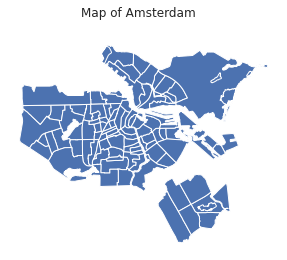

In [ ]:
# Plotting the map of Amsterdam to gain insights into the spatial distribution of 
#the 98 neighborhoods of Amsterdam

# Setup figure and axis
f, ax = plt.subplots(1)
# Adding the layer of polygons on the axis
data_correct.plot(ax=ax)
# Setting the figure title
f.suptitle('Map of Amsterdam')
# setting the axis off and displaying the map
ax.set_axis_off()
plt.show()

# Merging Dataframe

In [ ]:
#To connect the vulnerability variables to the spatial data, the two dataframes are merged on 'WIjkcode'
outer_merged = pd.merge(data_correct, data, how="outer", on=["Wijkcode"])
#Show the first 5 rows of the merged data
outer_merged.head()

Wijkcode                 Wijknaam Stadsdeelcode  Oppervlakte_m2  \
0      T92     Amstel III/Bullewijk             T         5273638   
1      T93  Bijlmer Centrum (D,F,H)             T         3158132   
2      T97                     Gein             T         1921404   
3      T95               Nellestein             T         2281664   
4      F83                  De Punt             F          599615   

           WijkID                                           geometry  \
0  03630012052066  POLYGON ((4.94021 52.31934, 4.94035 52.31916, ...   
1  03630012052062  POLYGON ((4.95676 52.32405, 4.96357 52.31660, ...   
2  03630012052005  POLYGON ((4.97990 52.30152, 4.98920 52.30155, ...   
3  03630012052064  MULTIPOLYGON (((4.99708 52.31487, 4.99652 52.3...   
4  03630012052024  POLYGON ((4.77729 52.35723, 4.77745 52.35720, ...   

         sdname         neighborhoodcodename         neighborhoodname  \
0    T Zuidoost     T92 Amstel III/Bullewijk     Amstel III/Bullewijk   
1    T Zuidoost  T93 Bijlmer-Centrum (D,F,H)  Bijlmer-Centrum (D,F,H)   
2    T Zuidoost                     T97 Gein                     Gein   
3    T Zuidoost               T95 Nellestein               Nellestein   
4  F Nieuw-West                  F83 De Punt                  De Punt   

   Older_old  ...  Debt_assistance  Energy_consumption  Shared_property  \
0          1  ...              0.8                 NaN              NaN   
1        348  ...              4.7               15.06        15.482959   
2        195  ...              2.7               10.83         5.810749   
3        138  ...              1.7               17.22         4.183038   
4        213  ...              3.0               10.27         5.416654   

   Under_occupancy  Full_time_student  Satisfaction_rate_communication  \
0              NaN               12.6                             58.0   
1              2.0               15.4                             58.0   
2              4.0                7.3                             81.0   
3              5.0                5.7                             81.0   
4              2.0                8.0                             84.0   

   Social_participation  Unemployment  Educational_level  \
0                   8.0           5.0               15.0   
1                   8.0          14.0               39.0   
2                   7.0          11.4               34.0   
3                   7.0           6.4               20.0   
4                   8.0          11.3               37.0   

   Unwillingness_invest_EE  
0                      NaN  
1                     70.0  
2                     57.0  
3                     49.0  
4                     68.0  

[5 rows x 38 columns]

In [ ]:
outer_merged.isnull().sum()

Wijkcode                            0
Wijknaam                            0
Stadsdeelcode                       0
Oppervlakte_m2                      0
WijkID                              0
geometry                            0
sdname                              0
neighborhoodcodename                0
neighborhoodname                    0
Older_old                           0
Young_children                      0
Lone_parent                         0
Mental_health_issues                0
Disability                          0
Precarious                          2
Proficiency_in_Dutch                0
Ethnicity                           0
Large_household_size                0
Private_renting                    13
Social_housing_renting             13
Gender                              0
Energy_inefficient_property         0
Old_heating_system                 15
No_solar_panels                    14
No_income                           1
Retired                             3
Provision_of

In [ ]:
#checking if there are rows in which more than 50% (29:2=14,5=15) of the rows are missing
outer_merged=outer_merged.dropna(thresh=15)
outer_merged.isnull().sum()
outer_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Wijkcode                         98 non-null     object  
 1   Wijknaam                         98 non-null     object  
 2   Stadsdeelcode                    98 non-null     object  
 3   Oppervlakte_m2                   98 non-null     int64   
 4   WijkID                           98 non-null     object  
 5   geometry                         98 non-null     geometry
 6   sdname                           98 non-null     object  
 7   neighborhoodcodename             98 non-null     object  
 8   neighborhoodname                 98 non-null     object  
 9   Older_old                        98 non-null     int64   
 10  Young_children                   98 non-null     float64 
 11  Lone_parent                      98 non-null     int64   
 12  Me

In [ ]:
#not needed
del outer_merged['WijkID']
#not needed
del outer_merged['Oppervlakte_m2']
#double not required for the analysis
del outer_merged['neighborhoodcodename']
#Double info
del outer_merged['Wijknaam']



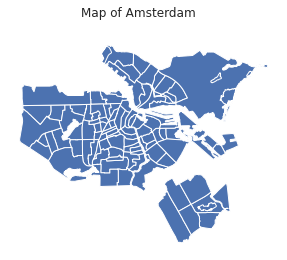

In [ ]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Adding the layer of polygons on the axis
outer_merged.plot(ax=ax)
# Setting the figure title
f.suptitle('Map of Amsterdam')
# setting the axis off and displaying the map
ax.set_axis_off()
plt.show()

In [ ]:
outer_merged = outer_merged.sort_values(['Wijkcode'])
outer_merged.head()

Wijkcode Stadsdeelcode                                           geometry  \
16      A00             A  POLYGON ((4.90242 52.37715, 4.90242 52.37715, ...   
42      A01             A  POLYGON ((4.89131 52.37632, 4.89391 52.37870, ...   
54      A02             A  POLYGON ((4.88478 52.37653, 4.88817 52.38022, ...   
78      A03             A  POLYGON ((4.89388 52.36729, 4.89394 52.36724, ...   
67      A04             A  MULTIPOLYGON (((4.90291 52.37643, 4.90352 52.3...   

       sdname         neighborhoodname  Older_old  Young_children  \
16  A Centrum    Burgwallen-Oude Zijde         73             4.2   
42  A Centrum  Burgwallen-Nieuwe Zijde         72             4.0   
54  A Centrum      Grachtengordel-West        172             9.0   
78  A Centrum      Grachtengordel-Zuid        150            10.1   
67  A Centrum       Nieuwmarkt/Lastage        386             7.9   

    Lone_parent  Mental_health_issues  Disability  ...  Debt_assistance  \
16          110                     8           9  ...              0.7   
42           72                     8           8  ...              0.5   
54          140                     6           7  ...              0.2   
78          117                     6           7  ...              0.2   
67          356                     7          12  ...              0.7   

    Energy_consumption  Shared_property  Under_occupancy  Full_time_student  \
16               16.75        15.014899              0.0               13.7   
42                9.81        19.739749              1.0               10.2   
54                9.66        18.647350              2.0                8.3   
78               10.90        16.913127              2.0                8.0   
67                8.68        19.516382              1.0                9.4   

    Satisfaction_rate_communication  Social_participation  Unemployment  \
16                             79.0                  14.0           4.9   
42                             79.0                  14.0           3.8   
54                             79.0                  14.0           2.6   
78                             79.0                  14.0           3.0   
67                             78.0                  13.0           6.9   

    Educational_level  Unwillingness_invest_EE  
16               10.0                     54.0  
42                9.0                     55.0  
54                7.0                     46.0  
78                9.0                     41.0  
67               11.0                     49.0  

[5 rows x 34 columns]

In [ ]:
outer_merged=outer_merged.set_index('neighborhoodname')
outer_merged.head()

Wijkcode Stadsdeelcode  \
neighborhoodname                                 
Burgwallen-Oude Zijde        A00             A   
Burgwallen-Nieuwe Zijde      A01             A   
Grachtengordel-West          A02             A   
Grachtengordel-Zuid          A03             A   
Nieuwmarkt/Lastage           A04             A   

                                                                  geometry  \
neighborhoodname                                                             
Burgwallen-Oude Zijde    POLYGON ((4.90242 52.37715, 4.90242 52.37715, ...   
Burgwallen-Nieuwe Zijde  POLYGON ((4.89131 52.37632, 4.89391 52.37870, ...   
Grachtengordel-West      POLYGON ((4.88478 52.37653, 4.88817 52.38022, ...   
Grachtengordel-Zuid      POLYGON ((4.89388 52.36729, 4.89394 52.36724, ...   
Nieuwmarkt/Lastage       MULTIPOLYGON (((4.90291 52.37643, 4.90352 52.3...   

                            sdname  Older_old  Young_children  Lone_parent  \
neighborhoodname                                                             
Burgwallen-Oude Zijde    A Centrum         73             4.2          110   
Burgwallen-Nieuwe Zijde  A Centrum         72             4.0           72   
Grachtengordel-West      A Centrum        172             9.0          140   
Grachtengordel-Zuid      A Centrum        150            10.1          117   
Nieuwmarkt/Lastage       A Centrum        386             7.9          356   

                         Mental_health_issues  Disability  Precarious  ...  \
neighborhoodname                                                       ...   
Burgwallen-Oude Zijde                       8           9         3.1  ...   
Burgwallen-Nieuwe Zijde                     8           8         2.8  ...   
Grachtengordel-West                         6           7         0.4  ...   
Grachtengordel-Zuid                         6           7         0.7  ...   
Nieuwmarkt/Lastage                          7          12         1.4  ...   

                         Debt_assistance  Energy_consumption  Shared_property  \
neighborhoodname                                                                
Burgwallen-Oude Zijde                0.7               16.75        15.014899   
Burgwallen-Nieuwe Zijde              0.5                9.81        19.739749   
Grachtengordel-West                  0.2                9.66        18.647350   
Grachtengordel-Zuid                  0.2               10.90        16.913127   
Nieuwmarkt/Lastage                   0.7                8.68        19.516382   

                         Under_occupancy  Full_time_student  \
neighborhoodname                                              
Burgwallen-Oude Zijde                0.0               13.7   
Burgwallen-Nieuwe Zijde              1.0               10.2   
Grachtengordel-West                  2.0                8.3   
Grachtengordel-Zuid                  2.0                8.0   
Nieuwmarkt/Lastage                   1.0                9.4   

                         Satisfaction_rate_communication  \
neighborhoodname                                           
Burgwallen-Oude Zijde                               79.0   
Burgwallen-Nieuwe Zijde                             79.0   
Grachtengordel-West                                 79.0   
Grachtengordel-Zuid                                 79.0   
Nieuwmarkt/Lastage                                  78.0   

                         Social_participation  Unemployment  \
neighborhoodname                                              
Burgwallen-Oude Zijde                    14.0           4.9   
Burgwallen-Nieuwe Zijde                  14.0           3.8   
Grachtengordel-West                      14.0           2.6   
Grachtengordel-Zuid                      14.0           3.0   
Nieuwmarkt/Lastage                       13.0           6.9   

                         Educational_level  Unwillingness_invest_EE  
neighborhoodname                                                     
Burgwallen-Oude Zij

In [ ]:
outer_merged=outer_merged.rename(columns={ 'Wijkcode':' Neighborhood_Code', 'Stadsdeelcode':'Districtcode',  'sdname' : 'Districtname', 'neighborhoodname' : 'Neighborhoodname'})
outer_merged.head()

Neighborhood_Code Districtcode  \
neighborhoodname                                          
Burgwallen-Oude Zijde                  A00            A   
Burgwallen-Nieuwe Zijde                A01            A   
Grachtengordel-West                    A02            A   
Grachtengordel-Zuid                    A03            A   
Nieuwmarkt/Lastage                     A04            A   

                                                                  geometry  \
neighborhoodname                                                             
Burgwallen-Oude Zijde    POLYGON ((4.90242 52.37715, 4.90242 52.37715, ...   
Burgwallen-Nieuwe Zijde  POLYGON ((4.89131 52.37632, 4.89391 52.37870, ...   
Grachtengordel-West      POLYGON ((4.88478 52.37653, 4.88817 52.38022, ...   
Grachtengordel-Zuid      POLYGON ((4.89388 52.36729, 4.89394 52.36724, ...   
Nieuwmarkt/Lastage       MULTIPOLYGON (((4.90291 52.37643, 4.90352 52.3...   

                        Districtname  Older_old  Young_children  Lone_parent  \
neighborhoodname                                                               
Burgwallen-Oude Zijde      A Centrum         73             4.2          110   
Burgwallen-Nieuwe Zijde    A Centrum         72             4.0           72   
Grachtengordel-West        A Centrum        172             9.0          140   
Grachtengordel-Zuid        A Centrum        150            10.1          117   
Nieuwmarkt/Lastage         A Centrum        386             7.9          356   

                         Mental_health_issues  Disability  Precarious  ...  \
neighborhoodname                                                       ...   
Burgwallen-Oude Zijde                       8           9         3.1  ...   
Burgwallen-Nieuwe Zijde                     8           8         2.8  ...   
Grachtengordel-West                         6           7         0.4  ...   
Grachtengordel-Zuid                         6           7         0.7  ...   
Nieuwmarkt/Lastage                          7          12         1.4  ...   

                         Debt_assistance  Energy_consumption  Shared_property  \
neighborhoodname                                                                
Burgwallen-Oude Zijde                0.7               16.75        15.014899   
Burgwallen-Nieuwe Zijde              0.5                9.81        19.739749   
Grachtengordel-West                  0.2                9.66        18.647350   
Grachtengordel-Zuid                  0.2               10.90        16.913127   
Nieuwmarkt/Lastage                   0.7                8.68        19.516382   

                         Under_occupancy  Full_time_student  \
neighborhoodname                                              
Burgwallen-Oude Zijde                0.0               13.7   
Burgwallen-Nieuwe Zijde              1.0               10.2   
Grachtengordel-West                  2.0                8.3   
Grachtengordel-Zuid                  2.0                8.0   
Nieuwmarkt/Lastage                   1.0                9.4   

                         Satisfaction_rate_communication  \
neighborhoodname                                           
Burgwallen-Oude Zijde                               79.0   
Burgwallen-Nieuwe Zijde                             79.0   
Grachtengordel-West                                 79.0   
Grachtengordel-Zuid                                 79.0   
Nieuwmarkt/Lastage                                  78.0   

                         Social_participation  Unemployment  \
neighborhoodname                                              
Burgwallen-Oude Zijde                    14.0           4.9   
Burgwallen-Nieuwe Zijde                  14.0           3.8   
Grachtengordel-West                      14.0           2.6   
Grachtengordel-Zuid                      14.0           3.0   
Nieuwmarkt/Lastage                       13.0           6.9   

                         Educational_level  Unwillingness_invest_EE  
neighborhoodn

In [ ]:
#outer_merged.to_excel("merged.xlsx") 

# Data Cleaning

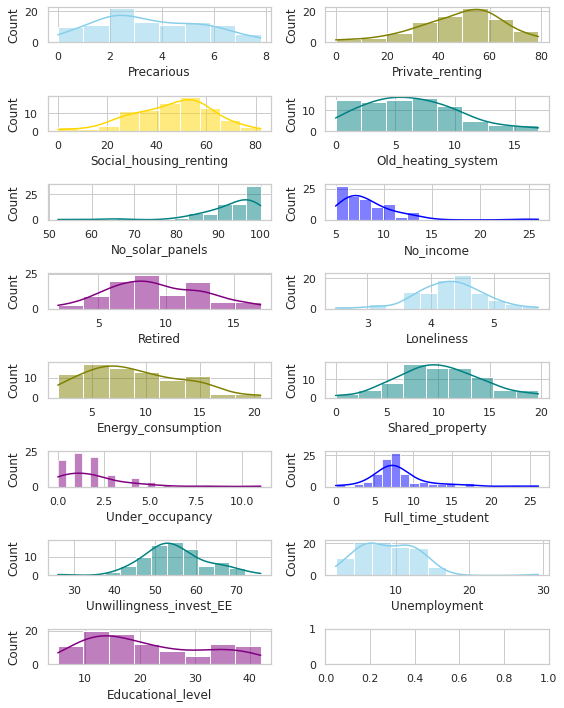

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")  
fig,axs = plt.subplots(8,2, figsize = (8,10))
sns.histplot(data=outer_merged, x="Precarious", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=outer_merged, x="Private_renting", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=outer_merged, x="Social_housing_renting", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=outer_merged, x="Old_heating_system", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=outer_merged, x="No_solar_panels", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=outer_merged, x="No_income", kde=True, color="blue", ax=axs[2, 1])
sns.histplot(data=outer_merged, x="Retired", kde=True, color="purple", ax=axs[3,0])
sns.histplot(data=outer_merged, x="Loneliness", kde=True, color="skyblue", ax=axs[3,1])
sns.histplot(data=outer_merged, x="Energy_consumption", kde=True, color="olive", ax=axs[4,0])
sns.histplot(data=outer_merged, x="Shared_property", kde=True, color="teal", ax=axs[4,1])
sns.histplot(data=outer_merged, x="Under_occupancy", kde=True, color="purple", ax=axs[5,0])
sns.histplot(data=outer_merged, x="Full_time_student", kde=True, color="blue", ax=axs[5,1])
sns.histplot(data=outer_merged, x="Unwillingness_invest_EE", kde=True, color="teal", ax=axs[6,0])
sns.histplot(data=outer_merged, x="Unemployment", kde=True, color="skyblue", ax=axs[6,1])
sns.histplot(data=outer_merged, x="Educational_level", kde=True, color="purple", ax=axs[7,0])

fig.tight_layout()

Precarious, private renting, social housing renting, old heating system, retired, loneliness, energy consumption, shared property, educational level and unwillingness to invest in energy efficiency are not heavenly skewed and approach a normal distribution thus it is decided to replace the missing values for the variables with the mean

unemployment, under occupancy, full-time student, no income are skewed to the left, whereas no solar panels is skewed to the right. It is decided to replace these missing values with the median.


In [ ]:
#Replacing the missing values of all variables with skewed data by the median value
outer_merged['Unemployment'] = outer_merged['Unemployment'].fillna(outer_merged['Unemployment'].median())
outer_merged['Under_occupancy'] = outer_merged['Under_occupancy'].fillna(outer_merged['Under_occupancy'].median())
outer_merged['Full_time_student'] = outer_merged['Full_time_student'].fillna(outer_merged['Full_time_student'].median())
outer_merged['No_income'] = outer_merged['No_income'].fillna(outer_merged['No_income'].median())
outer_merged['No_solar_panels'] = outer_merged['No_solar_panels'].fillna(outer_merged['No_solar_panels'].median())

In [ ]:
#Replacing the missing values of all variables that tend to have a normal distribution and are not heavily skewed by the mean
outer_merged['Precarious'] = outer_merged['Precarious'].fillna(outer_merged['Precarious'].mean())
outer_merged['Private_renting'] = outer_merged['Private_renting'].fillna(outer_merged['Private_renting'].mean())
outer_merged['Old_heating_system'] = outer_merged['Old_heating_system'].fillna(outer_merged['Old_heating_system'].mean())
outer_merged['Retired'] = outer_merged['Retired'].fillna(outer_merged['Retired'].mean())
outer_merged['Loneliness'] = outer_merged['Loneliness'].fillna(outer_merged['Loneliness'].mean())
outer_merged['Energy_consumption'] = outer_merged['Energy_consumption'].fillna(outer_merged['Energy_consumption'].mean())
outer_merged['Educational_level'] = outer_merged['Educational_level'].fillna(outer_merged['Educational_level'].mean())
outer_merged['Unwillingness_invest_EE'] = outer_merged['Unwillingness_invest_EE'].fillna(outer_merged['Unwillingness_invest_EE'].mean())
outer_merged['Shared_property'] = outer_merged['Shared_property'].fillna(outer_merged['Shared_property'].mean())
outer_merged['Social_housing_renting'] = outer_merged['Social_housing_renting'].fillna(outer_merged['Social_housing_renting'].mean())

In [ ]:
outer_merged.isnull().sum()

 Neighborhood_Code                 0
Districtcode                       0
geometry                           0
Districtname                       0
Older_old                          0
Young_children                     0
Lone_parent                        0
Mental_health_issues               0
Disability                         0
Precarious                         0
Proficiency_in_Dutch               0
Ethnicity                          0
Large_household_size               0
Private_renting                    0
Social_housing_renting             0
Gender                             0
Energy_inefficient_property        0
Old_heating_system                 0
No_solar_panels                    0
No_income                          0
Retired                            0
Provision_of_unpaid_care           0
Loneliness                         0
Debt_assistance                    0
Energy_consumption                 0
Shared_property                    0
Under_occupancy                    0
F

From the above code it can be seen that all missing values have been replaced with the dedicated missing value strategy. 

In [ ]:
outer_merged.columns

Index([' Neighborhood_Code', 'Districtcode', 'geometry', 'Districtname',
       'Older_old', 'Young_children', 'Lone_parent', 'Mental_health_issues',
       'Disability', 'Precarious', 'Proficiency_in_Dutch', 'Ethnicity',
       'Large_household_size', 'Private_renting', 'Social_housing_renting',
       'Gender', 'Energy_inefficient_property', 'Old_heating_system',
       'No_solar_panels', 'No_income', 'Retired', 'Provision_of_unpaid_care',
       'Loneliness', 'Debt_assistance', 'Energy_consumption',
       'Shared_property', 'Under_occupancy', 'Full_time_student',
       'Satisfaction_rate_communication', 'Social_participation',
       'Unemployment', 'Educational_level', 'Unwillingness_invest_EE'],
      dtype='object')

In [ ]:
outer_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 98 entries, Burgwallen-Oude Zijde to Driemond
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0    Neighborhood_Code               98 non-null     object  
 1   Districtcode                     98 non-null     object  
 2   geometry                         98 non-null     geometry
 3   Districtname                     98 non-null     object  
 4   Older_old                        98 non-null     int64   
 5   Young_children                   98 non-null     float64 
 6   Lone_parent                      98 non-null     int64   
 7   Mental_health_issues             98 non-null     int64   
 8   Disability                       98 non-null     int64   
 9   Precarious                       98 non-null     float64 
 10  Proficiency_in_Dutch             98 non-null     int64   
 11  Ethnicity                        98 non-null

In [ ]:
#show cleaned dataframe with each row representing a neighborhood and no missing values
outer_merged.head()

Neighborhood_Code Districtcode  \
neighborhoodname                                          
Burgwallen-Oude Zijde                  A00            A   
Burgwallen-Nieuwe Zijde                A01            A   
Grachtengordel-West                    A02            A   
Grachtengordel-Zuid                    A03            A   
Nieuwmarkt/Lastage                     A04            A   

                                                                  geometry  \
neighborhoodname                                                             
Burgwallen-Oude Zijde    POLYGON ((4.90242 52.37715, 4.90242 52.37715, ...   
Burgwallen-Nieuwe Zijde  POLYGON ((4.89131 52.37632, 4.89391 52.37870, ...   
Grachtengordel-West      POLYGON ((4.88478 52.37653, 4.88817 52.38022, ...   
Grachtengordel-Zuid      POLYGON ((4.89388 52.36729, 4.89394 52.36724, ...   
Nieuwmarkt/Lastage       MULTIPOLYGON (((4.90291 52.37643, 4.90352 52.3...   

                        Districtname  Older_old  Young_children  Lone_parent  \
neighborhoodname                                                               
Burgwallen-Oude Zijde      A Centrum         73             4.2          110   
Burgwallen-Nieuwe Zijde    A Centrum         72             4.0           72   
Grachtengordel-West        A Centrum        172             9.0          140   
Grachtengordel-Zuid        A Centrum        150            10.1          117   
Nieuwmarkt/Lastage         A Centrum        386             7.9          356   

                         Mental_health_issues  Disability  Precarious  ...  \
neighborhoodname                                                       ...   
Burgwallen-Oude Zijde                       8           9         3.1  ...   
Burgwallen-Nieuwe Zijde                     8           8         2.8  ...   
Grachtengordel-West                         6           7         0.4  ...   
Grachtengordel-Zuid                         6           7         0.7  ...   
Nieuwmarkt/Lastage                          7          12         1.4  ...   

                         Debt_assistance  Energy_consumption  Shared_property  \
neighborhoodname                                                                
Burgwallen-Oude Zijde                0.7               16.75        15.014899   
Burgwallen-Nieuwe Zijde              0.5                9.81        19.739749   
Grachtengordel-West                  0.2                9.66        18.647350   
Grachtengordel-Zuid                  0.2               10.90        16.913127   
Nieuwmarkt/Lastage                   0.7                8.68        19.516382   

                         Under_occupancy  Full_time_student  \
neighborhoodname                                              
Burgwallen-Oude Zijde                0.0               13.7   
Burgwallen-Nieuwe Zijde              1.0               10.2   
Grachtengordel-West                  2.0                8.3   
Grachtengordel-Zuid                  2.0                8.0   
Nieuwmarkt/Lastage                   1.0                9.4   

                         Satisfaction_rate_communication  \
neighborhoodname                                           
Burgwallen-Oude Zijde                               79.0   
Burgwallen-Nieuwe Zijde                             79.0   
Grachtengordel-West                                 79.0   
Grachtengordel-Zuid                                 79.0   
Nieuwmarkt/Lastage                                  78.0   

                         Social_participation  Unemployment  \
neighborhoodname                                              
Burgwallen-Oude Zijde                    14.0           4.9   
Burgwallen-Nieuwe Zijde                  14.0           3.8   
Grachtengordel-West                      14.0           2.6   
Grachtengordel-Zuid                      14.0           3.0   
Nieuwmarkt/Lastage                       13.0           6.9   

                         Educational_level  Unwillingness_invest_EE  
neighborhoodn

# Exploratory Data Analysis
---

In this section EDA is performed to gain general insights in what data we have, its distribution and correlation with other variables. 

## Distribution of the variables 

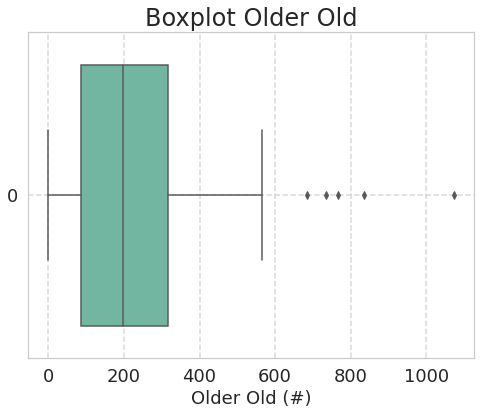

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data=outer_merged.Older_old, orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Older Old (#)', fontsize=18);
ax.set_title('Boxplot Older Old', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

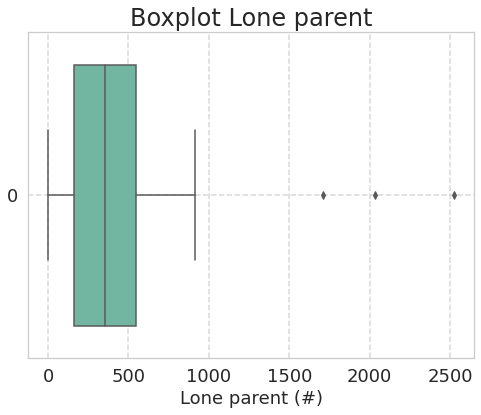

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Lone_parent'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Lone parent (#)', fontsize=18);
ax.set_title('Boxplot Lone parent', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

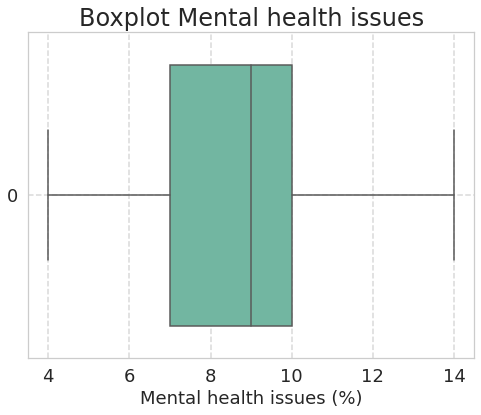

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Mental_health_issues'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Mental health issues (%)', fontsize=18);
ax.set_title('Boxplot Mental health issues', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)


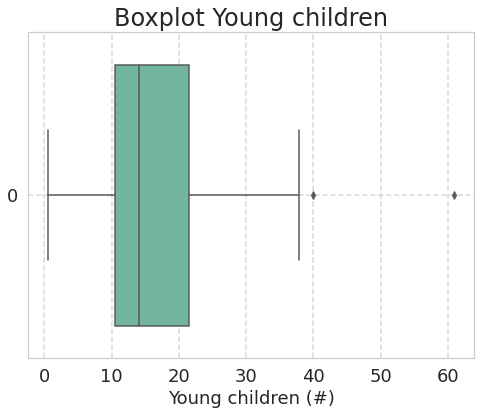

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Young_children'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Young children (#)', fontsize=18);
ax.set_title('Boxplot Young children', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

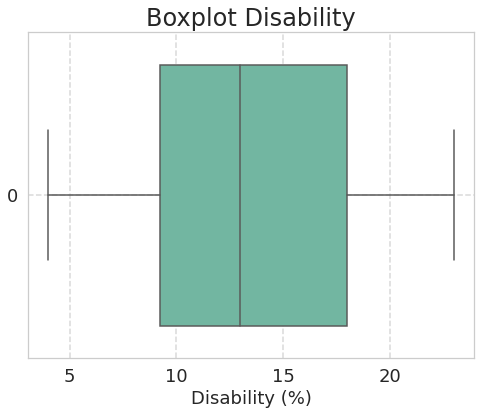

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Disability'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Disability (%)', fontsize=18);
ax.set_title('Boxplot Disability', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

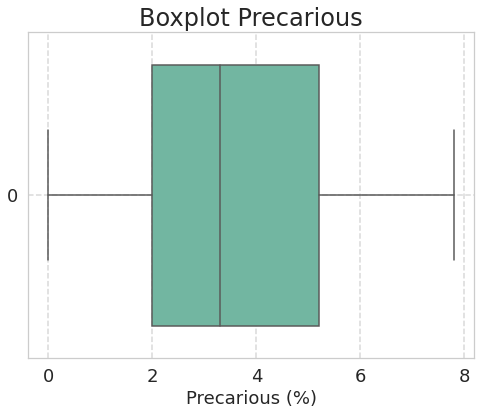

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Precarious'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Precarious (%)', fontsize=18);
ax.set_title('Boxplot Precarious', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

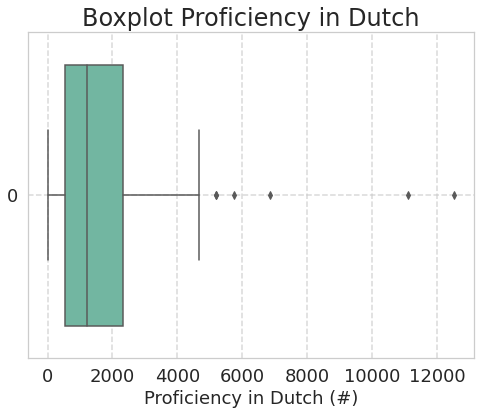

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Proficiency_in_Dutch'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Proficiency in Dutch (#)', fontsize=18);
ax.set_title('Boxplot Proficiency in Dutch', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

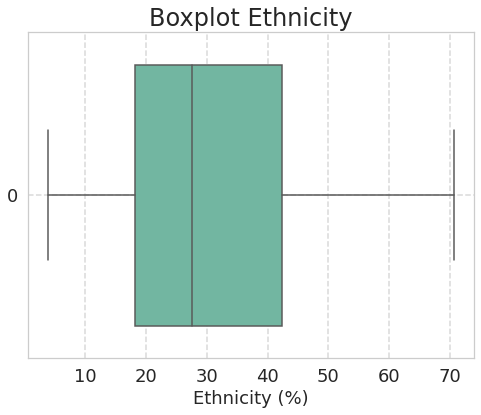

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Ethnicity'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Ethnicity (%)', fontsize=18);
ax.set_title('Boxplot Ethnicity', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

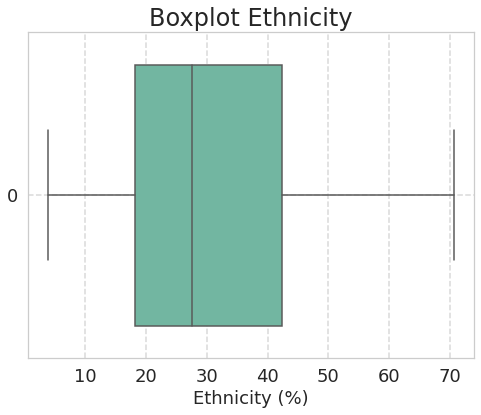

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Ethnicity'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Ethnicity (%)', fontsize=18);
ax.set_title('Boxplot Ethnicity', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

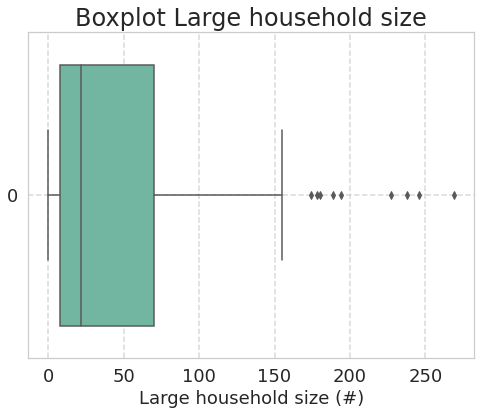

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Large_household_size'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Large household size (#)', fontsize=18);
ax.set_title('Boxplot Large household size', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

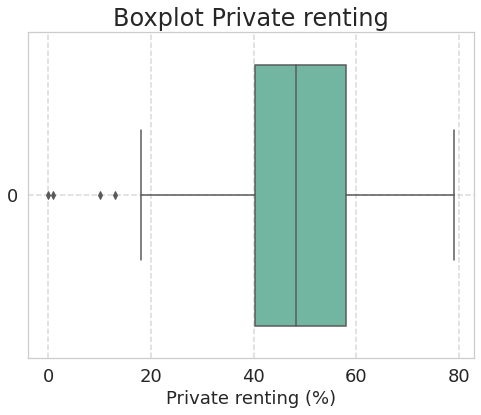

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Private_renting'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Private renting (%)', fontsize=18);
ax.set_title('Boxplot Private renting', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

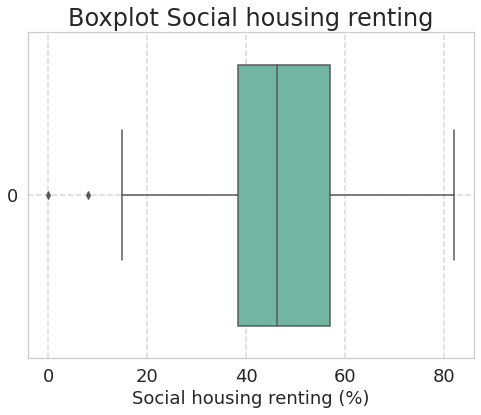

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Social_housing_renting'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Social housing renting (%)', fontsize=18);
ax.set_title('Boxplot Social housing renting', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

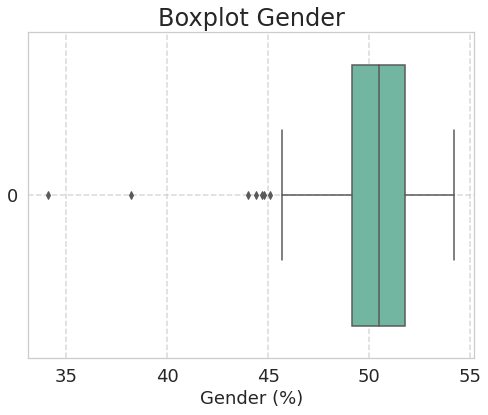

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Gender'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Gender (%)', fontsize=18);
ax.set_title('Boxplot Gender', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

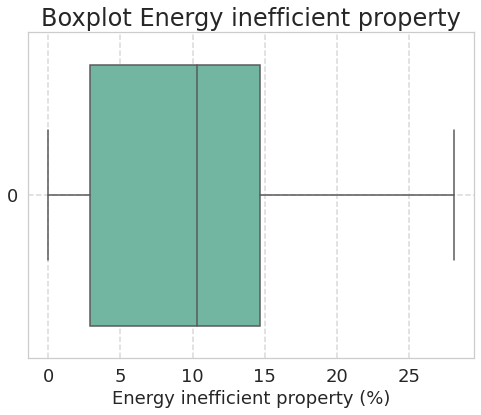

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Energy_inefficient_property'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Energy inefficient property (%)', fontsize=18);
ax.set_title('Boxplot Energy inefficient property', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

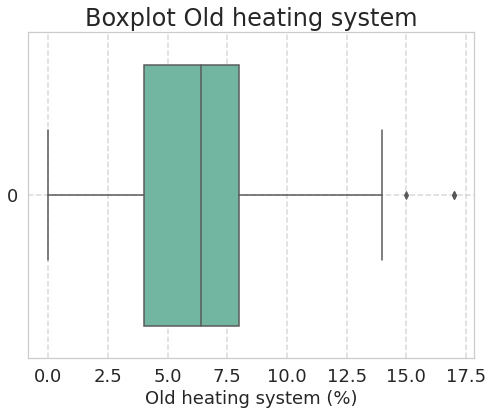

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Old_heating_system'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Old heating system (%)', fontsize=18);
ax.set_title('Boxplot Old heating system', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

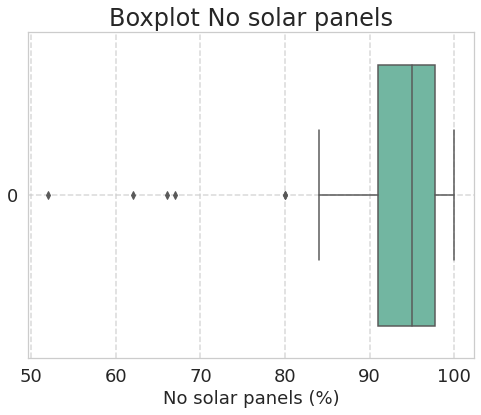

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['No_solar_panels'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('No solar panels (%)', fontsize=18);
ax.set_title('Boxplot No solar panels', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

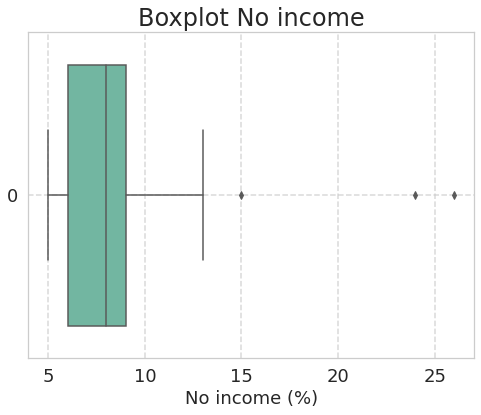

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['No_income'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('No income (%)', fontsize=18);
ax.set_title('Boxplot No income', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

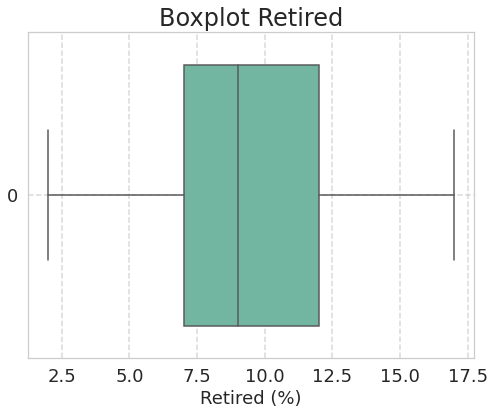

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Retired'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Retired (%)', fontsize=18);
ax.set_title('Boxplot Retired', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

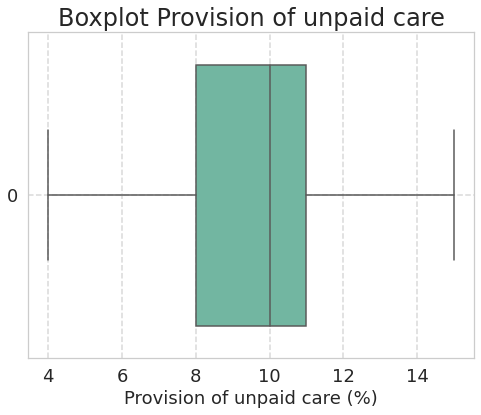

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Provision_of_unpaid_care'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Provision of unpaid care (%)', fontsize=18);
ax.set_title('Boxplot Provision of unpaid care', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

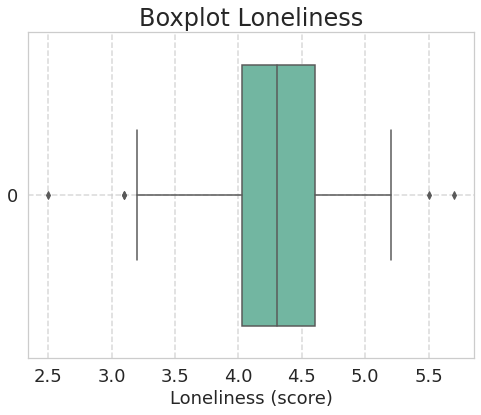

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Loneliness'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Loneliness (score)', fontsize=18);
ax.set_title('Boxplot Loneliness', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

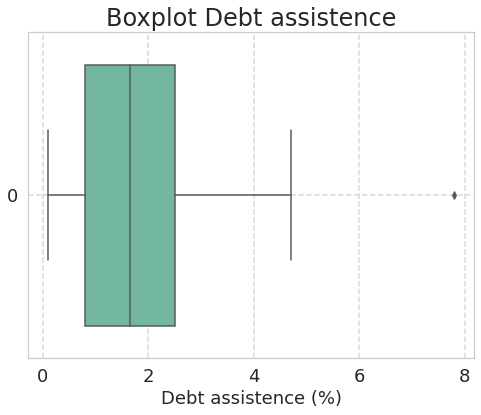

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Debt_assistance'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Debt assistence (%)', fontsize=18);
ax.set_title('Boxplot Debt assistence', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

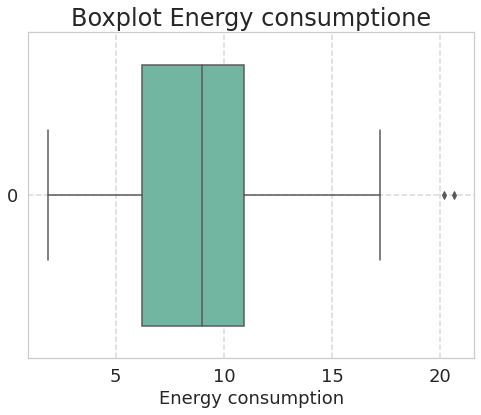

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Energy_consumption'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Energy consumption', fontsize=18);
ax.set_title('Boxplot Energy consumptione', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

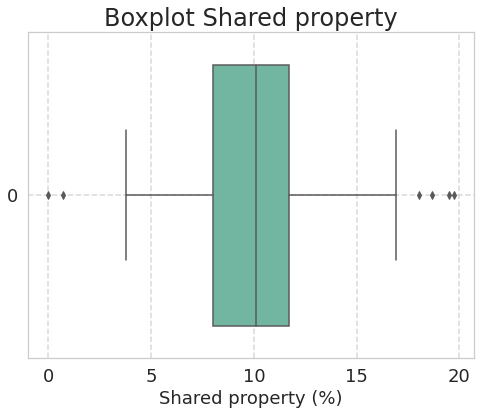

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Shared_property'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Shared property (%)', fontsize=18);
ax.set_title('Boxplot Shared property', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

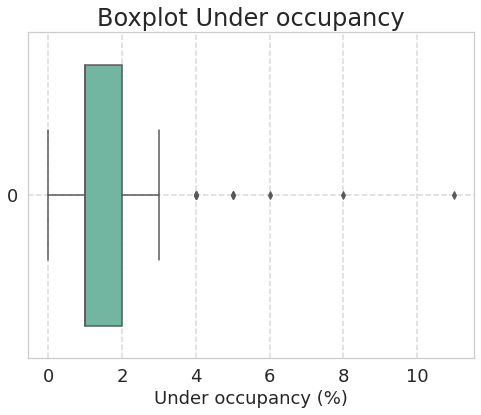

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Under_occupancy'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Under occupancy (%)', fontsize=18);
ax.set_title('Boxplot Under occupancy', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

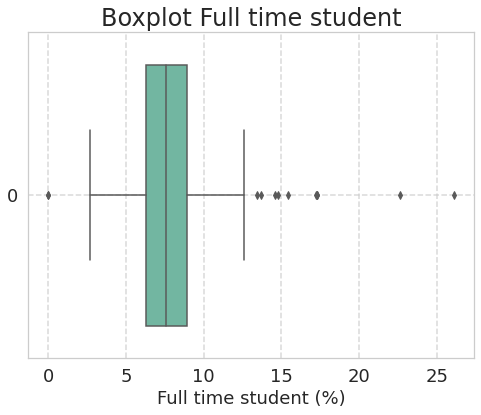

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Full_time_student'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Full time student (%)', fontsize=18);
ax.set_title('Boxplot Full time student', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

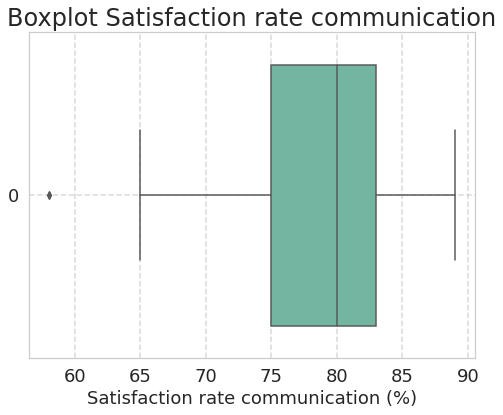

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Satisfaction_rate_communication'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Satisfaction rate communication (%)', fontsize=18);
ax.set_title('Boxplot Satisfaction rate communication', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

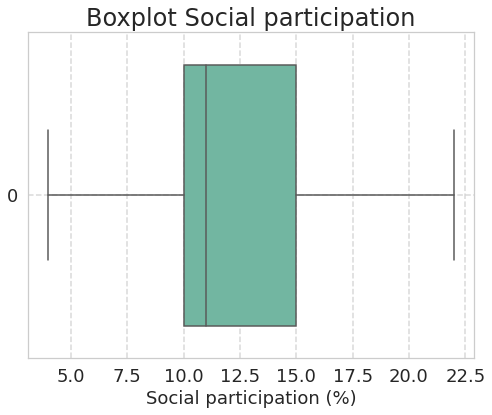

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Social_participation'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Social participation (%)', fontsize=18);
ax.set_title('Boxplot Social participation', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

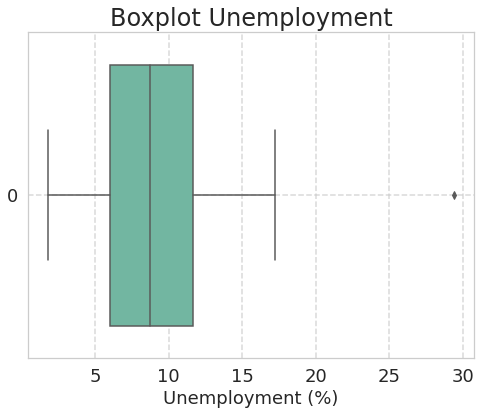

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Unemployment'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Unemployment (%)', fontsize=18);
ax.set_title('Boxplot Unemployment', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

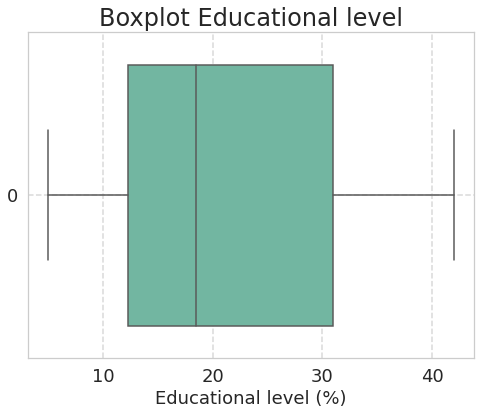

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Educational_level'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Educational level (%)', fontsize=18);
ax.set_title('Boxplot Educational level', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

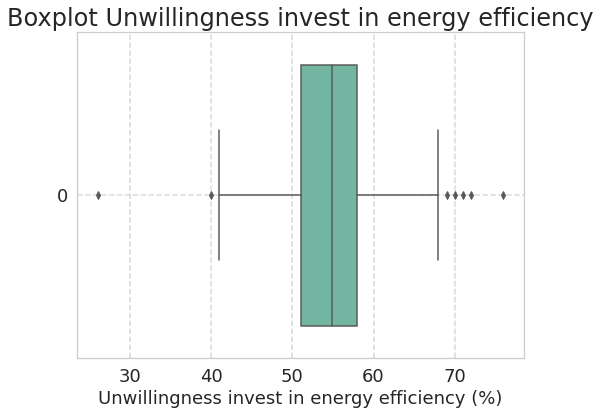

In [ ]:
#defining the size
plt.figure(figsize=(8,6))
#defining the boxplot
ax = sns.boxplot(data= outer_merged['Unwillingness_invest_EE'], orient="h", palette="Set2")
ax.grid(True, lw=1.5, ls='--', alpha=0.75)
ax.tick_params(labelsize=18)
ax.set_xlabel('Unwillingness invest in energy efficiency (%)', fontsize=18);
ax.set_title('Boxplot Unwillingness invest in energy efficiency', fontsize=24)
#removing text shown above the plot.
for txt in ax.texts:
    txt.set_visible(False)

## Correlations between variables

In [ ]:
outer_merged.corr()

Older_old  Young_children  Lone_parent  \
Older_old                         1.000000       -0.065866     0.609354   
Young_children                   -0.065866        1.000000     0.018762   
Lone_parent                       0.609354        0.018762     1.000000   
Mental_health_issues              0.202381       -0.284170     0.410832   
Disability                        0.469422        0.086865     0.561219   
Precarious                       -0.029446        0.180353     0.047538   
Proficiency_in_Dutch              0.553745        0.016278     0.938469   
Ethnicity                         0.280076        0.096725     0.615666   
Large_household_size              0.455407        0.216329     0.787726   
Private_renting                   0.188464       -0.273509     0.317825   
Social_housing_renting            0.201385       -0.157782     0.373474   
Gender                            0.339890        0.252495     0.205550   
Energy_inefficient_property       0.191934       -0.190600    -0.158118   
Old_heating_system               -0.157607       -0.260980    -0.271334   
No_solar_panels                   0.115444       -0.226472    -0.002694   
No_income                        -0.072692       -0.126299    -0.176336   
Retired                           0.296689        0.237030    -0.031346   
Provision_of_unpaid_care          0.082205        0.722500     0.002583   
Loneliness                        0.122020       -0.214127     0.146494   
Debt_assistance                   0.112196        0.066144     0.481801   
Energy_consumption                0.171194       -0.083391     0.228172   
Shared_property                  -0.044363       -0.349408    -0.007134   
Under_occupancy                   0.166615        0.344023     0.085849   
Full_time_student                -0.055891       -0.361625     0.068413   
Satisfaction_rate_communication  -0.016178       -0.120286    -0.157281   
Social_participation             -0.069458       -0.135450    -0.163500   
Unemployment                      0.222516       -0.077329     0.433570   
Educational_level                 0.290053        0.289911     0.532812   
Unwillingness_invest_EE           0.145298        0.070082     0.336093   

                                 Mental_health_issues  Disability  Precarious  \
Older_old                                    0.202381    0.469422   -0.029446   
Young_children                              -0.284170    0.086865    0.180353   
Lone_parent                                  0.410832    0.561219    0.047538   
Mental_health_issues                         1.000000    0.714698   -0.001747   
Disability                                   0.714698    1.000000    0.088048   
Precarious                                  -0.001747    0.088048    1.000000   
Proficiency_in_Dutch                         0.536469    0.597627    0.055471   
Ethnicity                                    0.785051    0.736553    0.088222   
Large_household_size                         0.618665    0.685130    0.013564   
Private_renting                              0.575957    0.471634    0.104923   
Social_housing_renting                       0.620296    0.573937    0.107140   
Gender                                      -0.009639    0.285048   -0.007173   
Energy_inefficient_property                 -0.135424    0.015607   -0.238114   
Old_heating_system                          -0.157566   -0.347518   -0.046992   
No_solar_panels                             -0.024855    0.077368   -0.086084   
No_income                                   -0.023365   -0.161020   -0.031620   
Retired                                     -0.357063    0.198860    0.129245   
Provision_of_unpaid_care                    -0.394062    0.234747    0.146646   
Loneliness                                   0.468536    0.257226   -0.010251   
Debt_assistance                              0.430734    0.466499    0.109347   
Energy_consumption                           0.312556    0.426313   -0.028621   


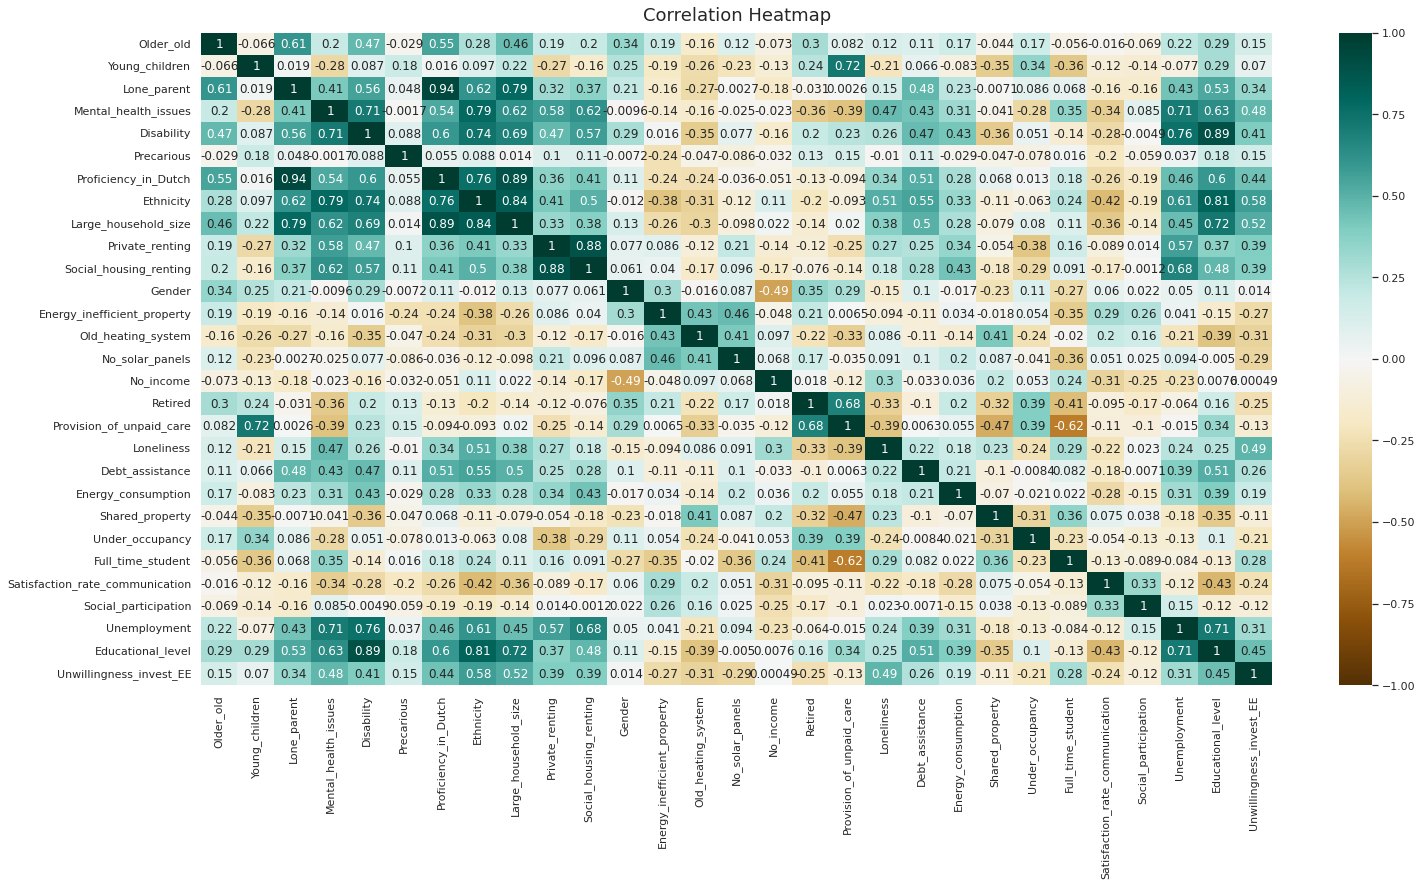

In [ ]:
plt.figure(figsize=(24, 12))
heatmap = sns.heatmap(outer_merged.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
np.triu(np.ones_like(outer_merged.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


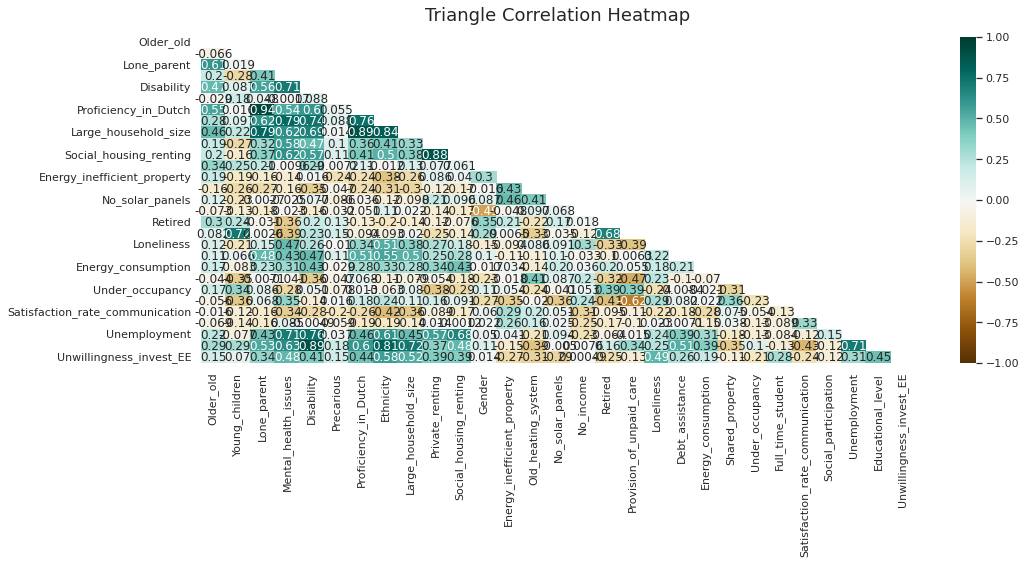

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(outer_merged.corr(), dtype=np.bool))
heatmap = sns.heatmap(outer_merged.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Exploratory Spatial Data Analysis
---
In this section the data is analysed spatially, to gain insights into the spatial distribution of each variable/ vulnerability indicator. 

To plot the spatial distribution the optimal number of clusters are determined using K-means and the elbow method. 

In [ ]:
#define all the vulnerability indicators 
vulnerability_indicators= outer_merged[['Older_old', 'Young_children', 'Lone_parent', 'Mental_health_issues',
       'Disability', 'Precarious', 'Proficiency_in_Dutch', 'Ethnicity',
       'Large_household_size', 'Private_renting', 'Social_housing_renting',
       'Gender', 'Energy_inefficient_property', 'Old_heating_system',
       'No_solar_panels', 'No_income', 'Retired', 'Provision_of_unpaid_care',
       'Loneliness', 'Debt_assistance', 'Energy_consumption',
       'Shared_property', 'Under_occupancy', 'Full_time_student',
       'Satisfaction_rate_communication', 'Social_participation',
       'Unemployment', 'Educational_level', 'Unwillingness_invest_EE']]

In [ ]:
#fit the k-means model
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(vulnerability_indicators)
    distortions.append(kmeanModel.inertia_)

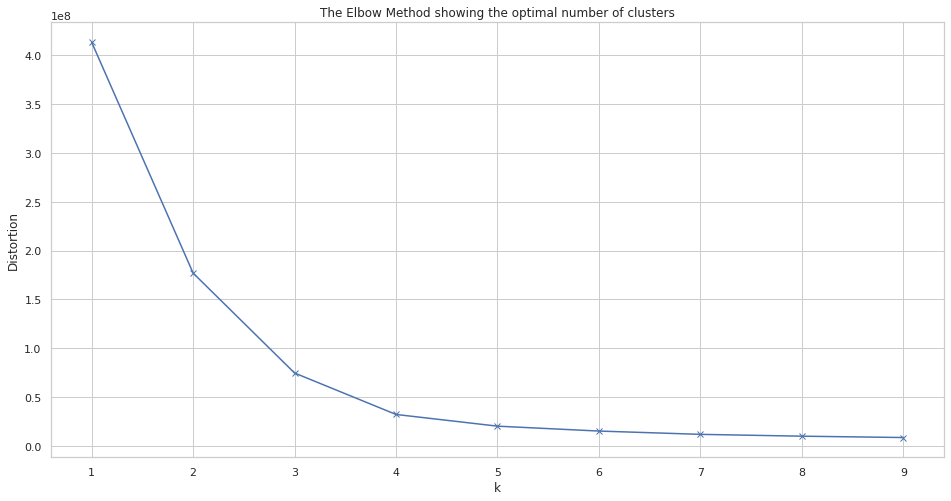

In [ ]:
#plot the elbow method plot to show the optimal number of clusters
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

From the plot above it can be seen that the sharpest drop is seen at 3 and after 5 clusters the difference is negligable. Thus it is decided to select 5 clusters. 

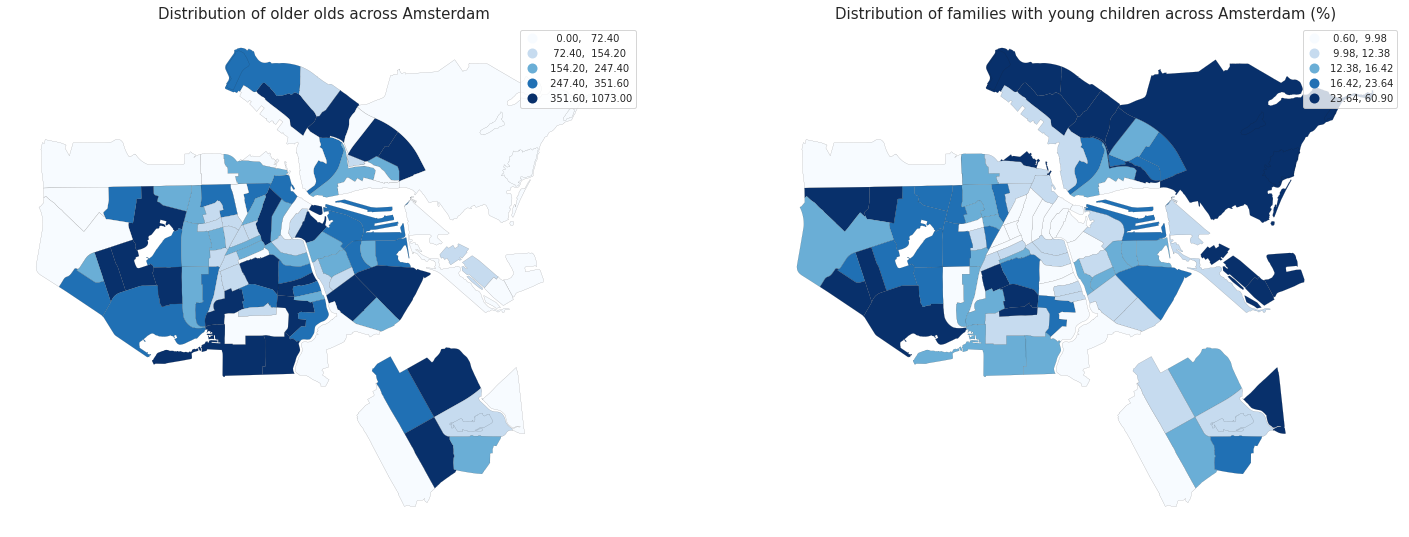

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Older_old", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of older olds across Amsterdam', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= "Young_children", k=5, scheme= 'quantiles' , legend = True, cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of families with young children across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()
#ax1 = plt.savefig("Distribution of Older Olds Across Amsterdam.png")

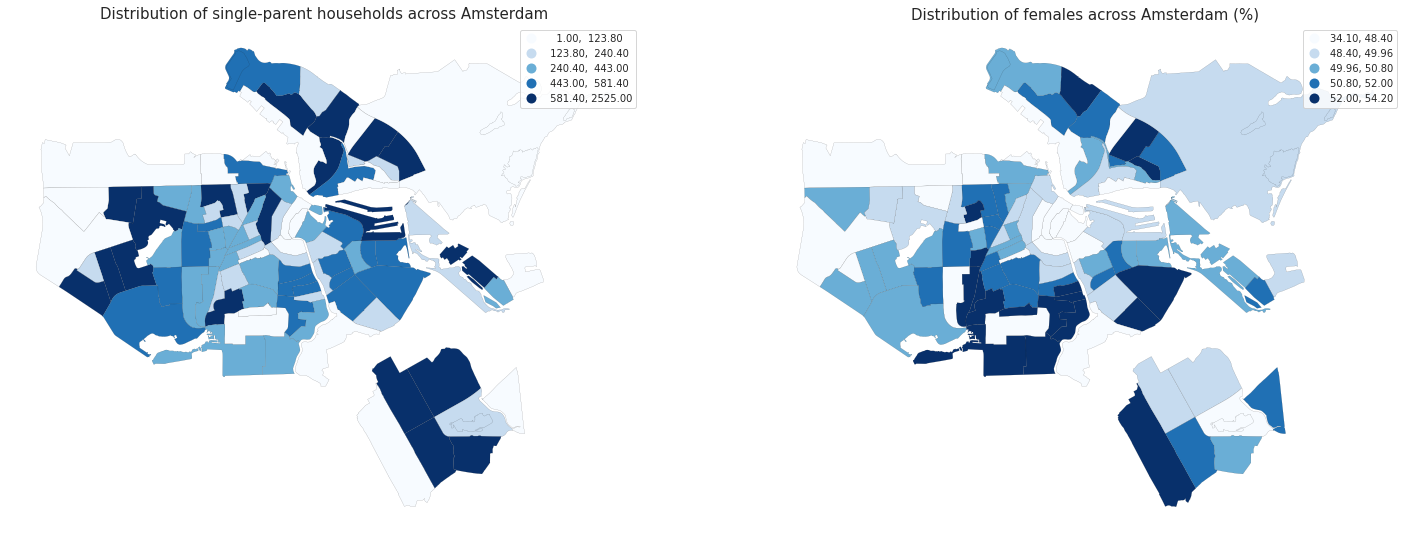

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Lone_parent", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of single-parent households across Amsterdam', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= "Gender", k=5, scheme= 'quantiles' , legend = True, cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of females across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()
#ax1 = plt.savefig("Distribution of Older Olds Across Amsterdam.png")

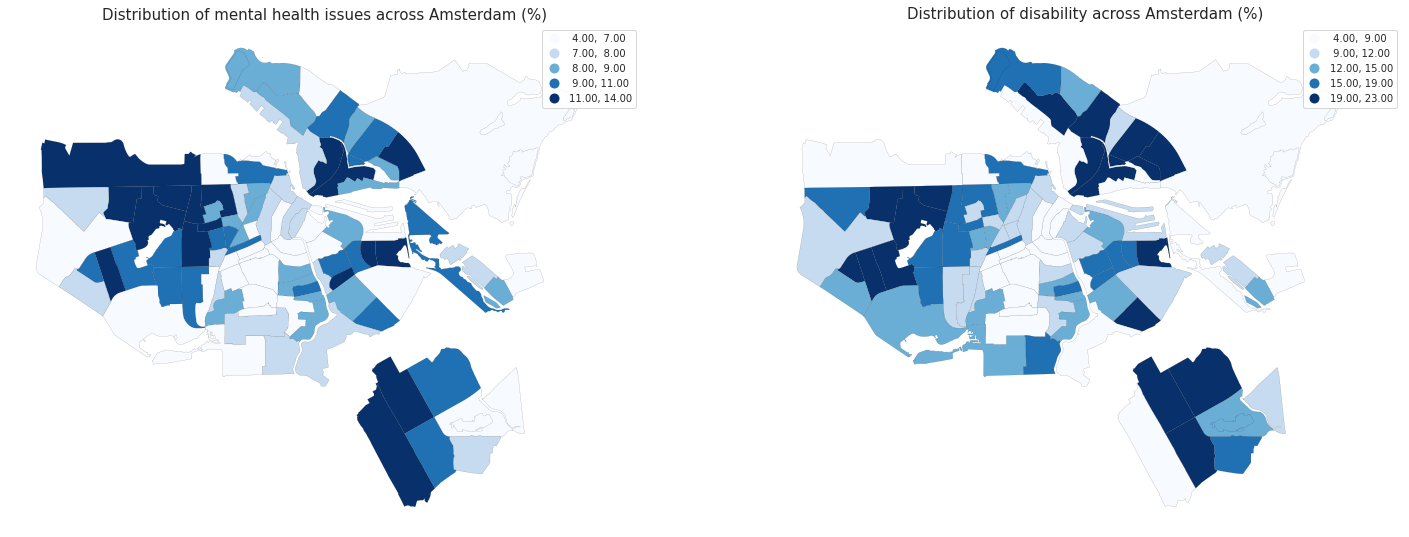

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Mental_health_issues", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of mental health issues across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= "Disability", k=5, scheme= 'quantiles' , legend = True, cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of disability across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()

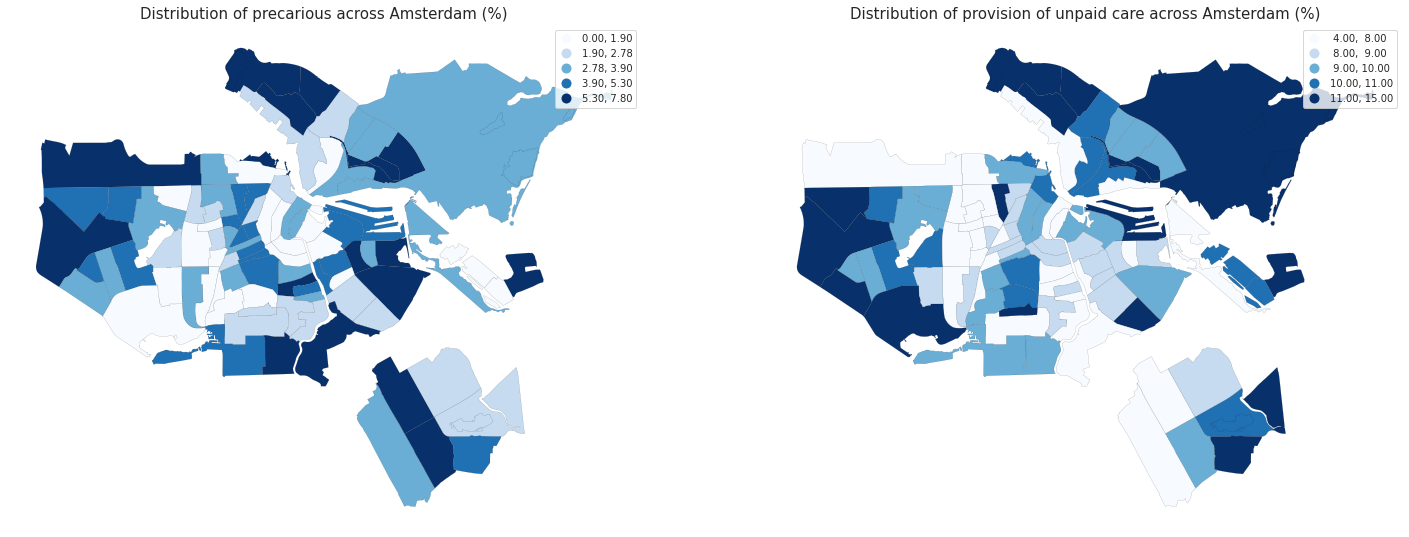

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Precarious", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of precarious across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= "Provision_of_unpaid_care", k=5, scheme= 'quantiles' , legend = True, cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of provision of unpaid care across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()

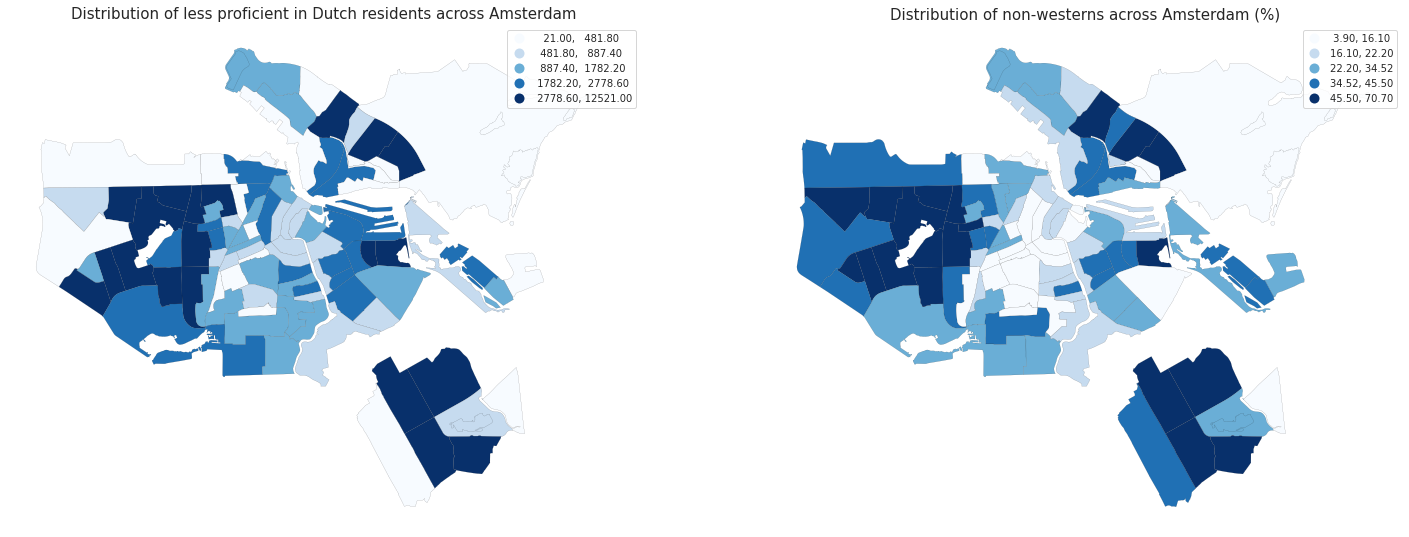

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Proficiency_in_Dutch", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of less proficient in Dutch residents across Amsterdam', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= "Ethnicity", k=5, scheme= 'quantiles' , legend = True, cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of non-westerns across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()

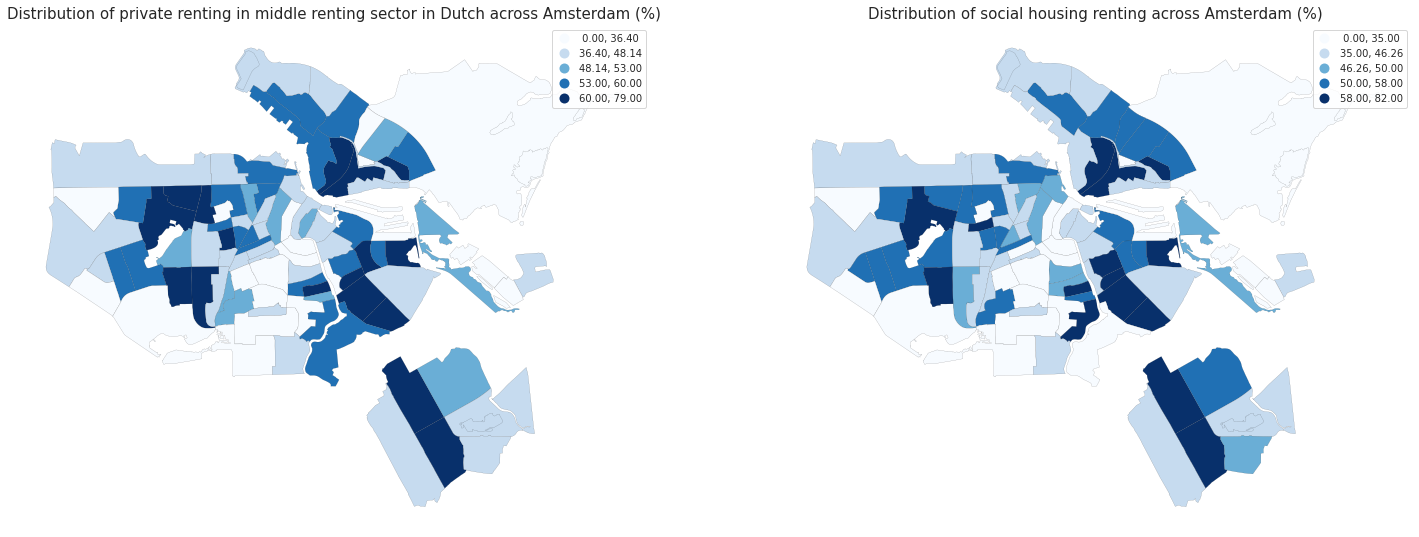

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Private_renting", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of private renting in middle renting sector in Dutch across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= "Social_housing_renting", k=5, scheme= 'quantiles' , legend = True, cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of social housing renting across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()

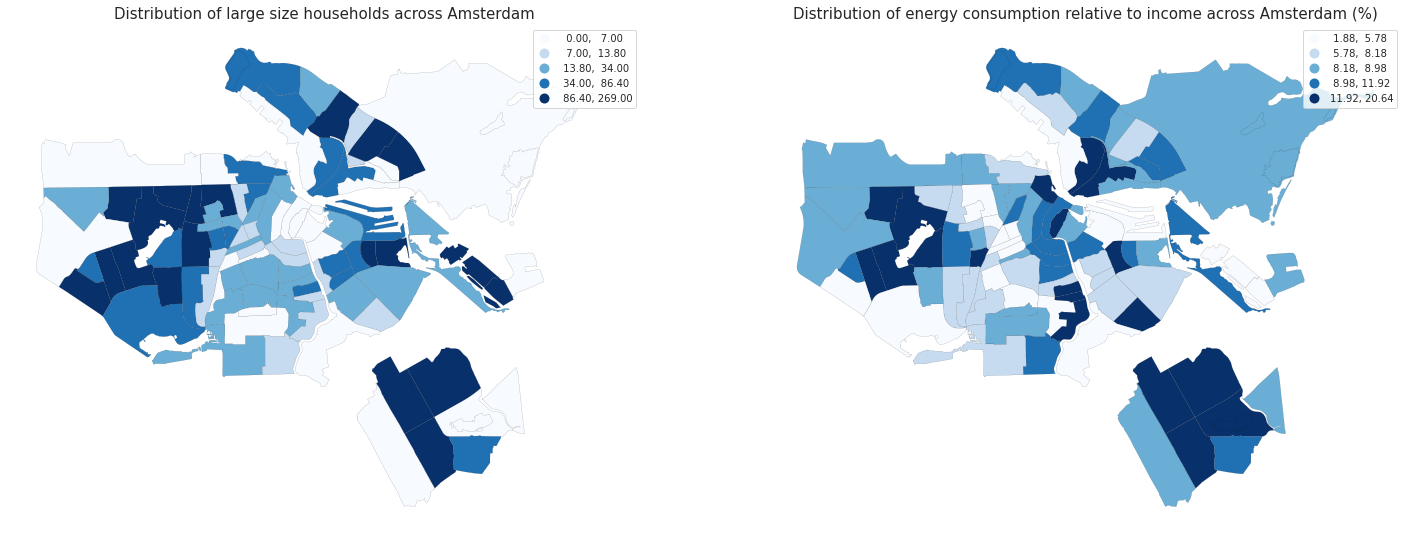

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Large_household_size", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of large size households across Amsterdam', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= "Energy_consumption", k=5, scheme= 'quantiles' , legend = True, cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of energy consumption relative to income across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()

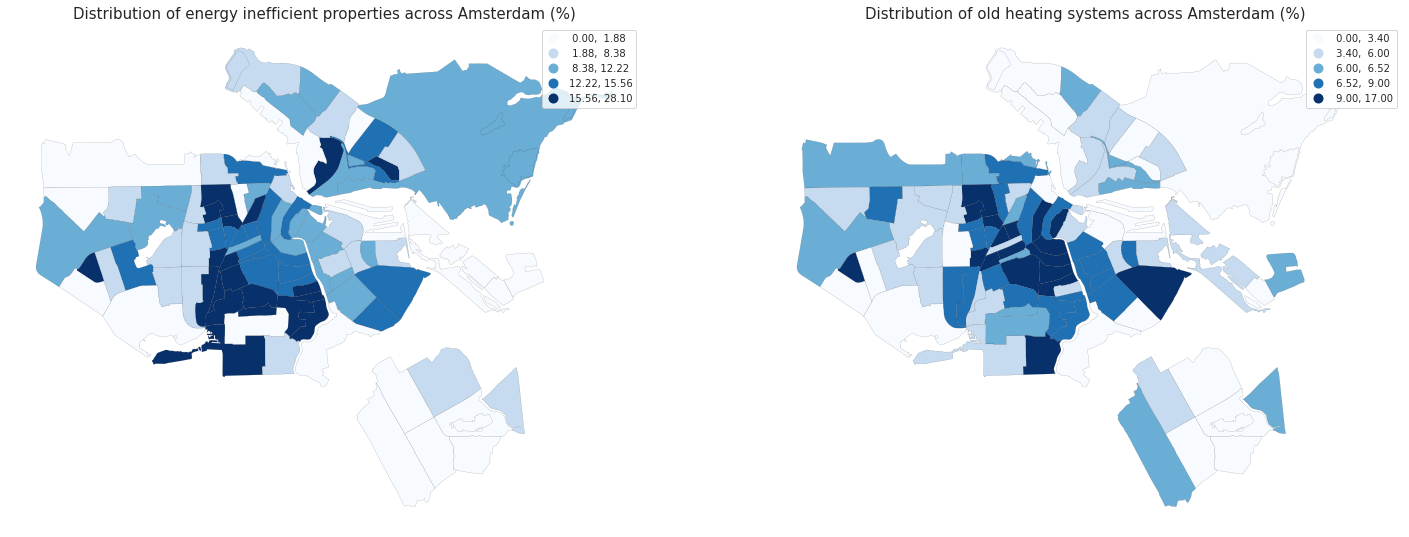

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Energy_inefficient_property", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of energy inefficient properties across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= "Old_heating_system", k=5, scheme= 'quantiles' , legend = True, cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of old heating systems across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()

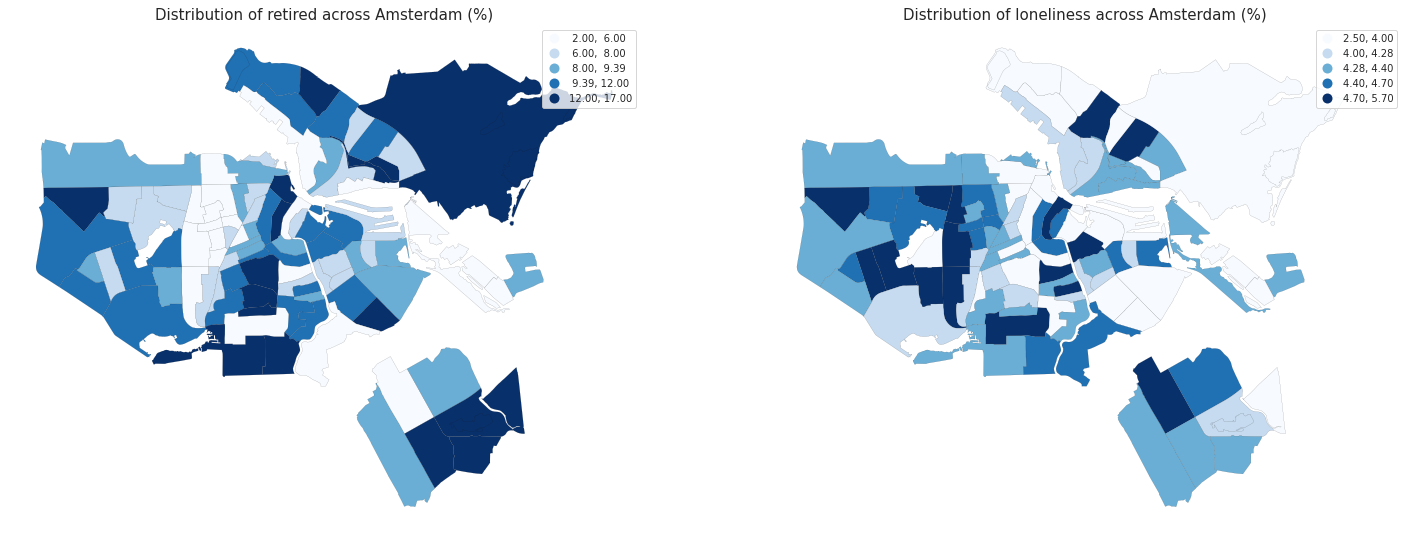

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Retired", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of retired across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= "Loneliness", k=5, scheme= 'quantiles' , legend = True, cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of loneliness across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()

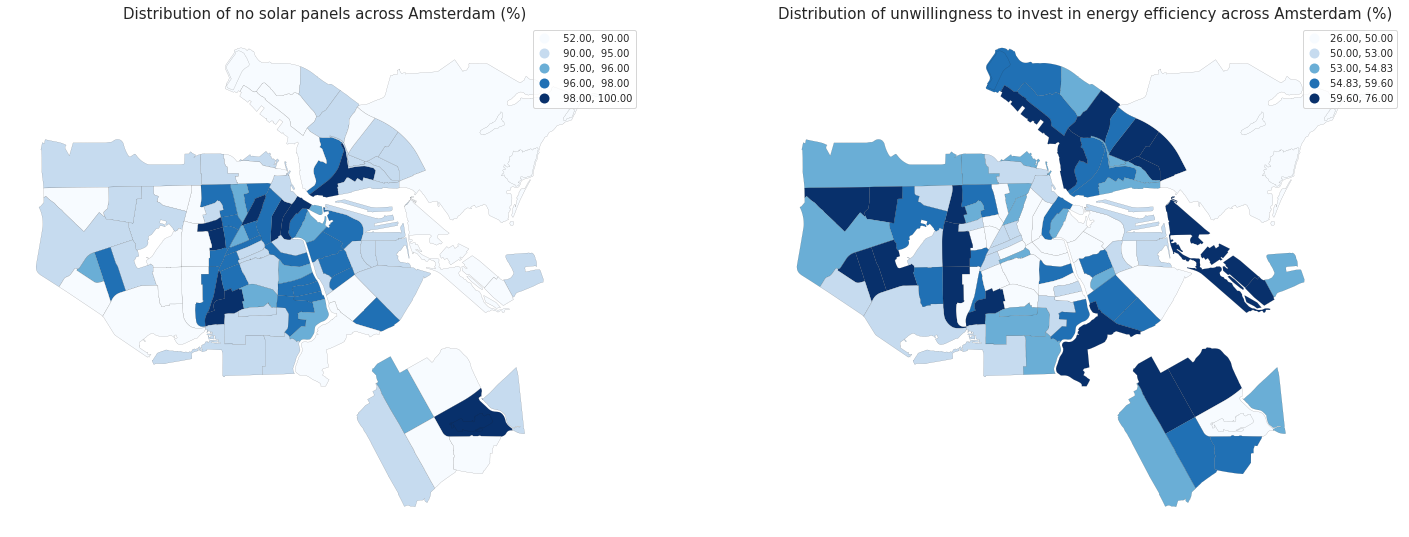

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "No_solar_panels", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of no solar panels across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= "Unwillingness_invest_EE", k=5, scheme= 'quantiles' , legend = True, cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of unwillingness to invest in energy efficiency across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()

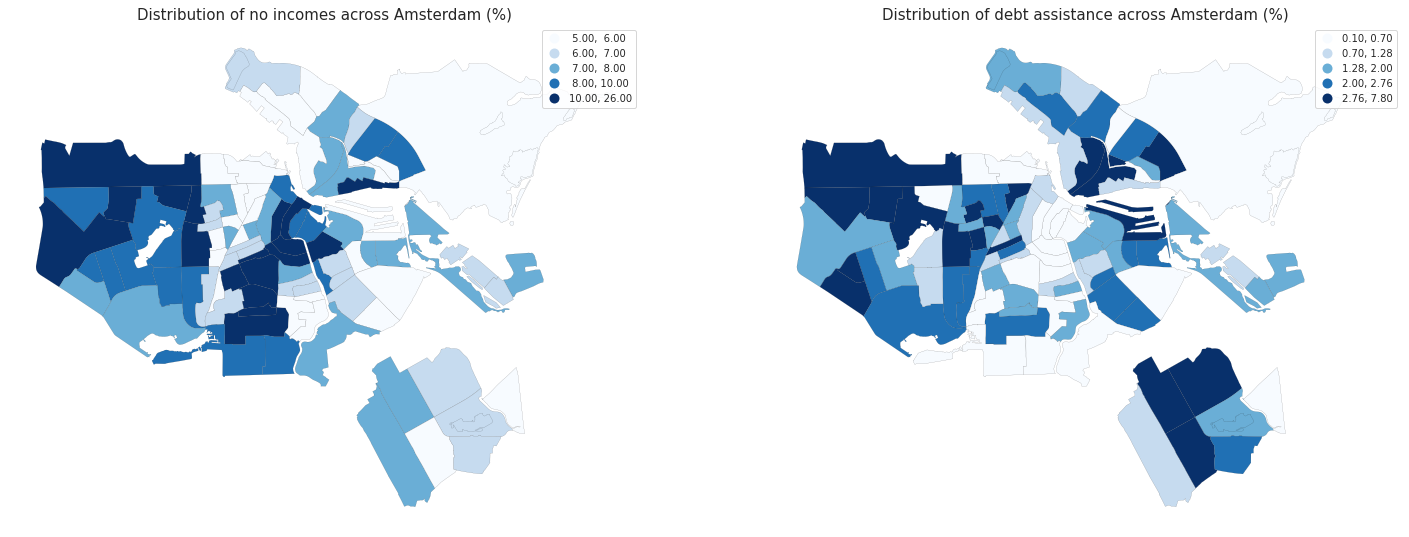

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "No_income", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of no incomes across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= "Debt_assistance", k=5, scheme= 'quantiles' , legend = True, cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of debt assistance across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


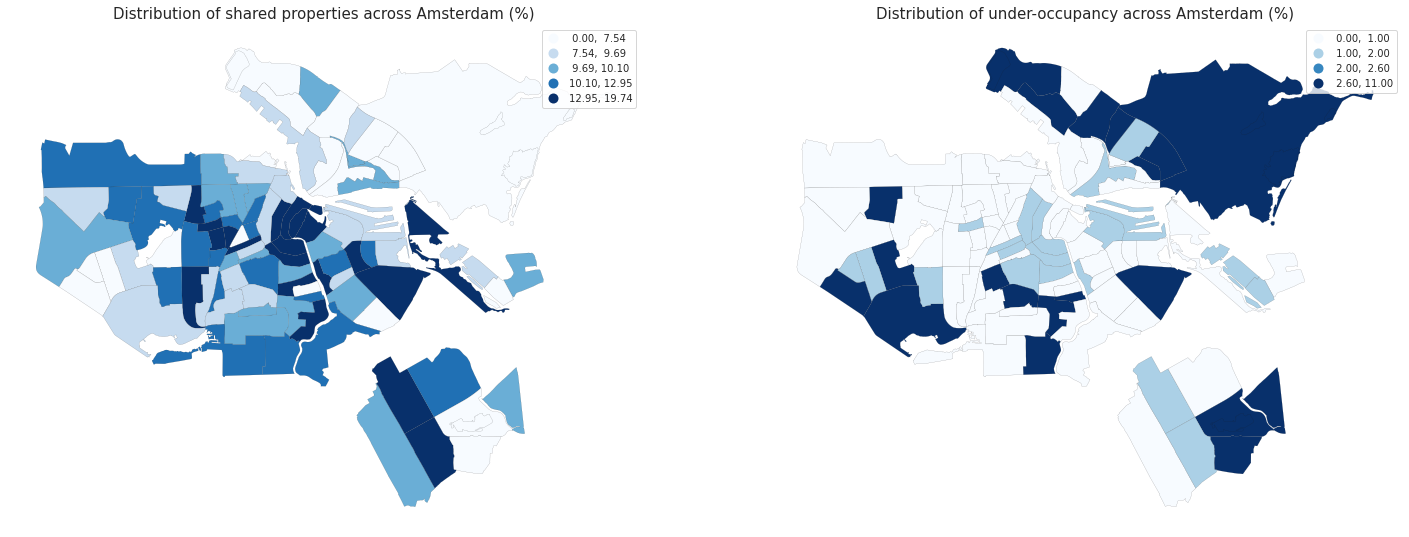

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Shared_property", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of shared properties across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= "Under_occupancy", k=5, scheme= 'quantiles' , legend = True, cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of under-occupancy across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()

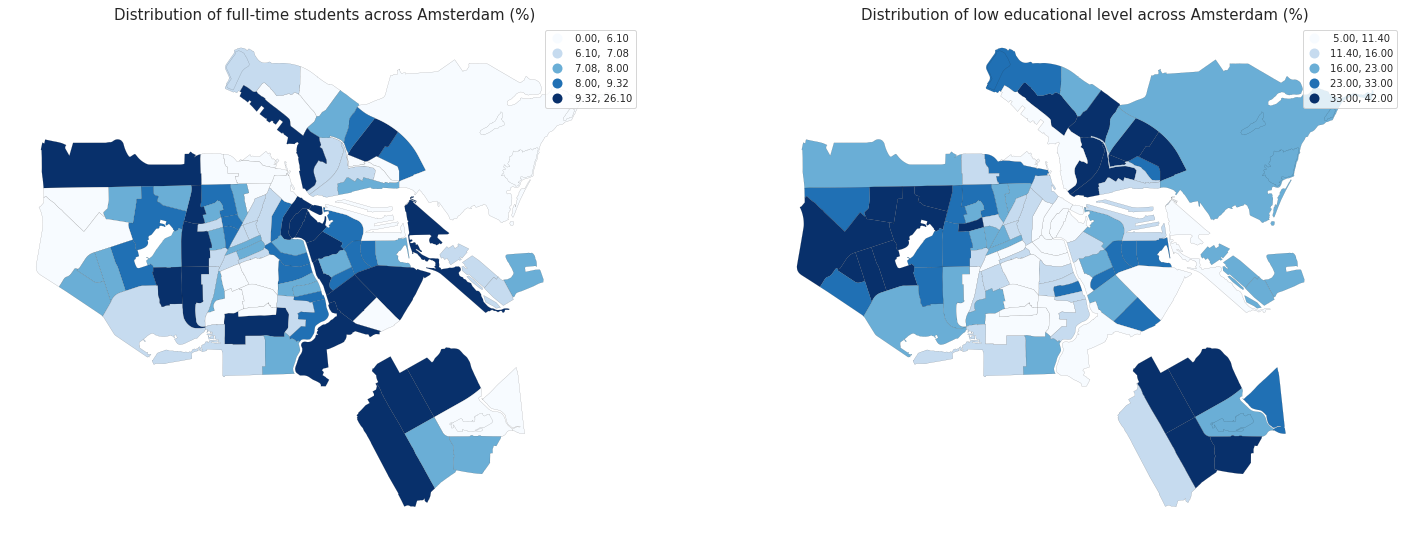

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Full_time_student", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of full-time students across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= "Educational_level", k=5, scheme= 'quantiles' , legend = True, cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of low educational level across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()

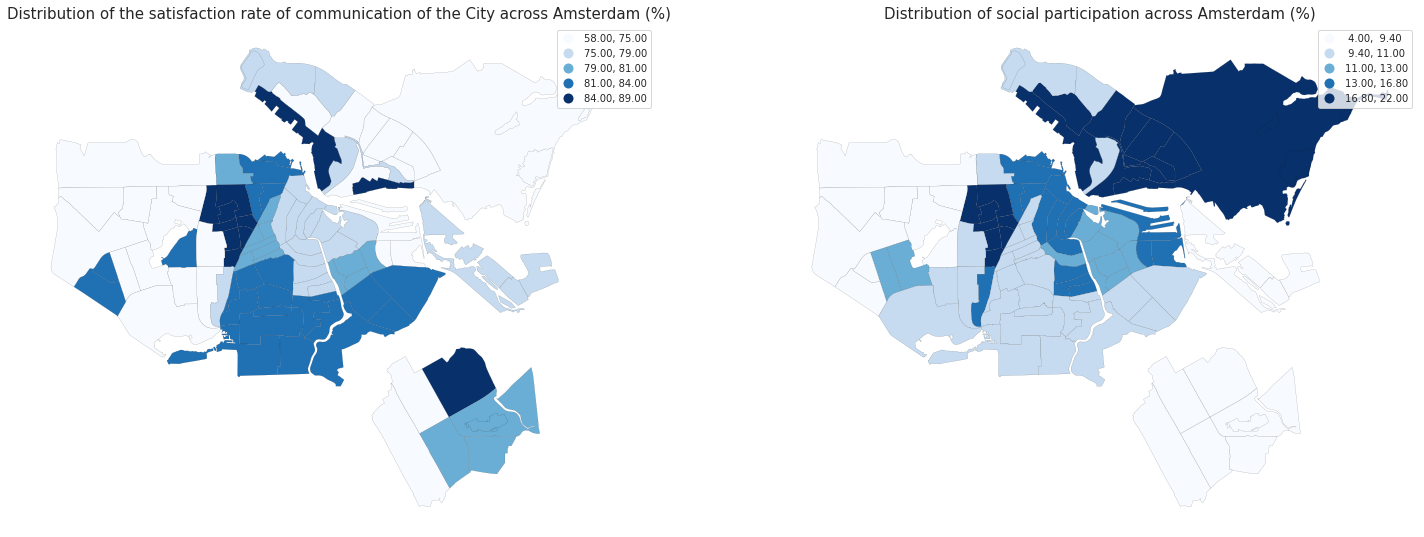

In [ ]:
#ESDA plots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Satisfaction_rate_communication", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of the satisfaction rate of communication of the City across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
ax2 = outer_merged.plot(column= "Social_participation", k=5, scheme= 'quantiles' , legend = True, cmap='Blues', alpha=1,
edgecolor='k', linewidth=0.1,  ax=ax2)
ax2.set_title('Distribution of social participation across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)
ax1.set_axis_off()
ax2.set_axis_off()

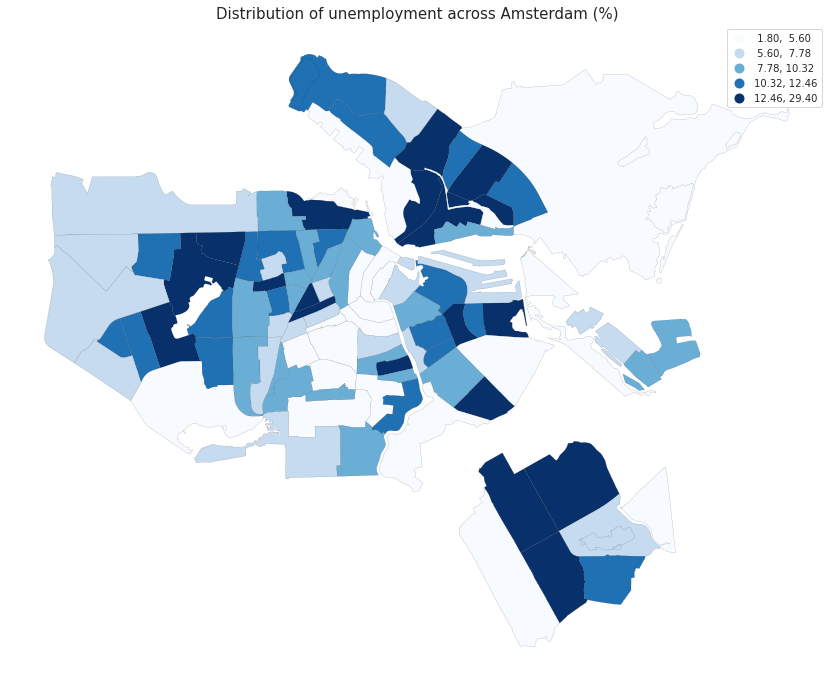

In [ ]:
#ESDA plots
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(25, 12))
#plotting the map
ax1 = outer_merged.plot(column= "Unemployment", k=5, scheme= 'quantiles' , cmap='Blues', alpha=1, edgecolor='k', linewidth=0.1, ax=ax1, legend=True )
ax1.set_title('Distribution of unemployment across Amsterdam (%)', fontdict={'fontsize':15, 'fontweight':3})
params = {'legend.fontsize':10,'legend.handlelength':1.5}
plot.rcParams.update(params)

ax1.set_axis_off()
ax2.set_axis_off()

In [ ]:
outer_merged.to_excel("dataframe_ready_for_pca_14_july.xlsx") 